In [1]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
import time
import pandas as pd
import math
from scipy.spatial import distance#
from pyproj import Proj,transform
import seaborn as sns
import copy
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
v84 = Proj(proj="latlong",towgs84="0,0,0",ellps="WGS84")
v36 = Proj(proj="latlong", k=0.9996012717, ellps="airy", towgs84="446.448,-125.157,542.060,0.1502,0.2470,0.8421,-20.4894")
vgrid = Proj(init="world:bng")
#Calculate Euclidean distances using H

# Make yourself the 'All_data' file, this only needs to be run once ever
It is commented out for me, uncomment this if it's your first time

In [2]:
# def dfLLtoEN(df):
#     """Returns easting, northing tuple
#     """
#     vlon36, vlat36 = transform(v84,v36,df["long"].values,df["lat"].values)
#     result = vgrid(vlon36,vlat36)

#     # Transform the output to a Dataframe
#     eastnorth = pd.DataFrame(index=df.index)
#     for i in result:
#         eastnorth["Easting"] = result[0]
#         eastnorth["Northing"] = result[1]

#     return round(eastnorth)

In [3]:
# Path = '../StudyGroup/'
# CompleteData=pd.read_csv(Path+"completeData2.csv",header = 0)
# CompleteData = CompleteData.drop(columns = 'Unnamed: 0')

In [4]:
# CompleteData[['Easting', 'Northing']] = dfLLtoEN(CompleteData[['lat', 'long']])

In [5]:
# CompleteData = CompleteData.rename(index=str, columns={'X__1': "study"})

In [6]:
# CompleteData.columns.values

In [7]:
# ImputedData = pd.read_csv('imputed_farm_reducedsize', header = 0, sep = '\t')
# ImputedData = ImputedData.rename(index=str, columns={'Unnamed: 0': "study"})

In [8]:
# ImputedData[['Easting', 'Northing']] = dfLLtoEN(ImputedData[['lat', 'long']])

In [9]:
# ImputedData['sr'] = ImputedData['ruminant']

In [10]:
# Data = pd.concat([CompleteData, ImputedData], ignore_index=True)

In [11]:
# xmax = np.max(Data['Easting'].values)
# xmin = np.min(Data['Easting'].values)
# ymax = np.max(Data['Northing'].values)
# ymin = np.min(Data['Northing'].values)
# sizex = xmax-xmin
# sizey = ymax-ymin
# Data['xcoord'] = Data['Easting'] - xmin
# Data['ycoord'] = Data['Northing'] - ymin

In [12]:
# Data.to_csv('All_data', sep='\t')

# Below, can be run once you have made 'All_data'

In [13]:
Data=pd.read_csv("All_data",sep = '\t', header = 0)

In [14]:
Copy1 = pd.read_csv('All_data', sep = '\t', header = 0)

In [15]:
copy2 = Copy1.values
true_cattle =  copy.deepcopy(copy2[:,3])
true_sheep =  copy.deepcopy(copy2[:,13])
cattle = copy2[:,3]
sheep = copy2[:,13]

In [16]:
xcoord = Data['xcoord'].values
ycoord = Data['ycoord'].values

In [17]:
joinedinput = np.column_stack((xcoord, ycoord))

In [18]:
N = len(Data)
N

6083

In [19]:
dist = distance.cdist(joinedinput, joinedinput, 'euclidean')
dist = dist/100000

In [20]:
equipment_list = Data['equipment'].values
shares_water_list = Data['water'].values
shares_grazing_list = Data['grazing'].values
shares_milk_list = Data['milk'].values
shares_vet_list = Data['vet'].values
contact_animal_list = Data['contact_animal'].values
contact_human_list = Data['contact_people'].values

In [21]:
# tr = np.random.negative_binomial(1, 1/2, N) #Draw immune periods (1 day)
tr = 2*np.ones(N)
print(np.mean(tr))
        
psi = 0.00657
# psi = 2.5
nu = 1.99*(10**(-4.8))
xi = 4.65
zeta = 2.80
chi = 0.403
phi = 0.799
rho = 0.000863


epsilon = np.zeros(N)
s = np.random.negative_binomial(50, 50/55, N) #Draw latent periods (5 days)
r = np.random.negative_binomial(30, 30/38, N) #Draw infectious periods (8 days)
# r = np.random.negative_binomial(8, 8/16, N)
sum(r==0)


2.0


8

In [22]:
np.max(dist)

1.3401452351517724

In [23]:
# kerneldist =(10e4*psi)/((10e2*psi)**2 + dist**2)   # This is without a cap
kerneldist = (psi)/(psi**2 + dist**2)
# kerneldist = np.zeros(shape=(N,N))
# for i in range(len(dist)):
#     for j in range(len(dist)):
#         if dist[i,j] <= 60:
#             kerneldist[i,j] = (psi)/((psi)**2 + dist[i,j]**2)

In [24]:
# This takes quite a while to run, sit back and have a cuppa
# once this has run, you won't need to run it again unless your kernel restarts

shares_equipment = np.zeros(shape = (N,N)) #cap at 10km
shares_water = np.zeros(shape = (N,N)) #cap at 10km
shares_grazing = np.zeros(shape=(N,N)) #cap at 10km
shares_milk = np.zeros(shape = (N,N)) #cap at 10km
shares_vet = np.zeros(shape = (N,N)) #cap at 10km
contactanimal = np.zeros(shape = (N,N))
contacthuman = np.zeros(shape = (N,N)) 

for i in range(N):
    print(i)
    for j in range(N):
        if i != j:
            if dist[i,j] <= 10/100:
                if (shares_milk_list[i]==1 and shares_milk_list[j] ==1):
                    shares_milk[i,j] = 1
                if (shares_water_list[i]==1 and shares_water_list[j] ==1):
                    shares_water[i,j] =1
                if (shares_grazing_list[i] ==1 and shares_grazing_list[j] ==1):
                    shares_grazing[i,j] =1
                if (equipment_list[i]==1 and equipment_list[j] ==1):
                    shares_equipment[i,j] =1
                if (shares_vet_list[i]==1 and shares_vet_list[j] ==1):
                    shares_vet[i,j] = 1
            if (contact_animal_list[i]==1 and contact_animal_list[j] ==1):
                contactanimal[i,j] = 1
            if (contact_human_list[i]==1 and contact_human_list[j] ==1):
                contacthuman[i,j] = 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070


3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731


5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376


In [25]:
q = np.random.negative_binomial(2*28, 2*28/(4*28), N) #Draw immune periods (2 months)
np.mean(q)
RingCull = 3 #km

In [26]:
# [a1, a2, a3,a4,a5,a6,a7] = [0.16964086, 0.16230848, 0.1756672,  0.06334324, 0.13775076, 0.13500596,0.15628351]
[a1, a2, a3,a4,a5,a6,a7] = (1/7)*np.ones(7)

transmission_matrix = (a1*shares_equipment+
 a2*shares_water+
 a3*shares_grazing + 
 a4*shares_milk + 
 a5*shares_vet + 
 a6*contactanimal + 
 a7*contacthuman)

In [27]:
farm_cost = np.zeros(N)
for i in range(0,N):
    farm_cost[i] = 150*sheep[i] + 150*cattle[i]

Data['cost'] = farm_cost

In [28]:
kerneldist[50,200]

0.02915958717086779

# Below is the main code.
- A[:,0] - index of farm (only added into the code when farm is infected or if its vaccinated)
- A[:,1] - time a farm is infected
- A[:,2] = s - length of time/period a farm is exposed for  (4 days)
- A[:,3]  =r - length of time/period a farm is infectious for (8 days)
- A[:,4] = tr - length of time/period a farm is waiting before triggering vaccines (1 day) - maybe we should delete this completely
- A[:,5] = q - length of time/period a farm is naturally immue for (2 months) 
- A[:,6] = end_q - time at which a farm becomes susceptible again
- A[:,7] = t_vac - time at which a farm is vaccinated
- A[:,8]=v - length of time/period a farm is immune for, induced from vaccines (6 months)
- A[:,9] =end_v - time at which vaccine immunity ends

In [45]:


Cumulative2 = []
Endemic2 = []
Maximum2 = []
Totalcost2 = []
Duration2 = []
Infection2 = []


<IPython.core.display.Javascript object>


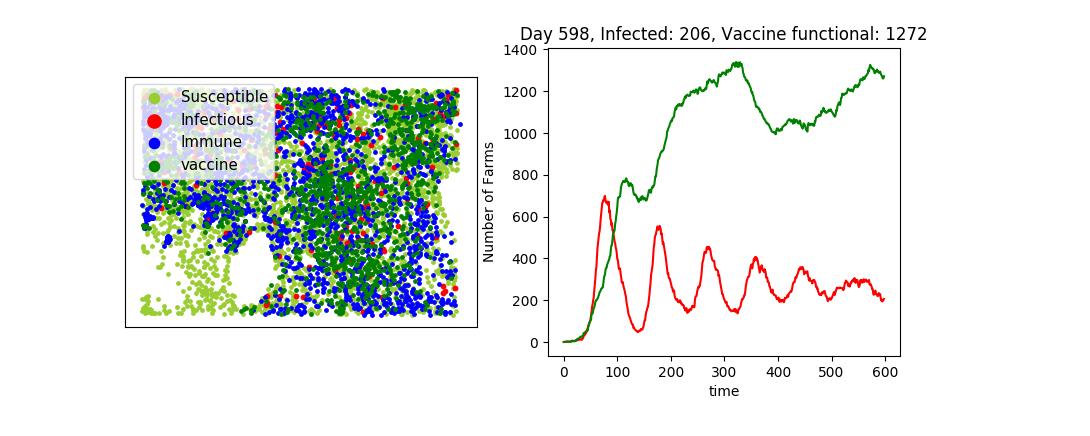

[]
[2223]
[2223]
[2223, 2224]
[2223, 2224]
[2223, 2224, 2225]
[2223, 2224, 2225]
[2224, 2225]
[2224, 2225]
[2128, 2224, 2225]
[2128, 2224]
[2128, 2224]
[1584, 2222, 2224]
[1584, 2222, 2224, 2319]
[1584, 1894, 2222, 2224, 2319]
[1584, 1894, 2035, 2222, 2224, 2319, 2324]
[1584, 1894, 2035, 2222, 2319, 2324]
[1584, 1894, 2222, 2319, 2324]
[1584, 1894, 2319, 2324]
[1584, 1894, 2319, 2324]
[1584, 1894, 2039, 2178, 2319, 2324, 2516]
[1584, 1894, 2039, 2178, 2227, 2319, 2516]
[1584, 1748, 1894, 2039, 2178, 2227, 2516, 3385]
[1748, 1894, 2039, 2227, 2458, 2461, 2516, 3385]
[1748, 2039, 2227, 2228, 2458, 2461, 2516, 3385]
[1748, 2039, 2227, 2228, 2417, 2458, 2461, 2516, 3385]
[1645, 2039, 2227, 2228, 2321, 2417, 2461, 2516, 3385]
[1645, 2039, 2131, 2227, 2228, 2321, 2417, 2461, 3385, 5388]
[1168, 1645, 2039, 2131, 2227, 2228, 2417, 2418, 2461, 2719, 3385, 5388]
[1168, 1645, 2039, 2131, 2228, 2417, 2418, 2461, 2719, 3385, 3669, 5388]
[1168, 1645, 2039, 2131, 2228, 2417, 2418, 2461, 2719, 3385, 3

[71, 225, 422, 430, 520, 555, 675, 692, 810, 915, 925, 930, 943, 995, 1007, 1010, 1151, 1169, 1175, 1232, 1240, 1247, 1284, 1292, 1295, 1297, 1353, 1357, 1366, 1367, 1371, 1409, 1415, 1416, 1421, 1498, 1522, 1643, 1644, 1711, 1750, 1751, 1752, 1809, 1815, 1831, 1832, 1842, 1844, 1845, 1936, 1939, 1947, 2005, 2023, 2029, 2038, 2046, 2135, 2226, 2369, 2413, 2421, 2463, 2517, 2523, 2610, 2616, 2620, 2644, 2657, 2708, 2725, 2825, 2826, 2830, 2889, 2916, 2925, 2927, 2928, 3006, 3013, 3031, 3210, 3289, 3290, 3303, 3382, 3470, 3471, 3472, 3479, 3486, 3546, 3563, 3565, 3634, 3662, 3677, 3742, 3747, 3773, 3777, 3857, 3877, 3945, 3947, 3952, 3967, 3977, 3984, 4053, 4054, 4057, 4060, 4071, 4076, 4078, 4095, 4096, 4152, 4163, 4164, 4233, 4237, 4243, 4244, 4246, 4256, 4299, 4301, 4303, 4312, 4370, 4378, 4381, 4388, 4467, 4549, 4556, 4614, 4617, 4630, 4646, 4700, 4713, 4767, 4790, 4842, 4866, 4914, 4918, 4921, 4928, 4932, 5081, 5094, 5122, 5139, 5187, 5241, 5266, 5308, 5359, 5361, 5365, 5428, 5620, 

[72, 75, 82, 91, 225, 422, 520, 590, 649, 672, 674, 676, 737, 752, 799, 803, 810, 857, 871, 875, 895, 911, 1042, 1093, 1114, 1119, 1128, 1129, 1131, 1134, 1157, 1159, 1175, 1179, 1185, 1187, 1217, 1232, 1237, 1247, 1297, 1298, 1362, 1364, 1367, 1369, 1376, 1400, 1413, 1423, 1425, 1463, 1474, 1485, 1498, 1527, 1531, 1534, 1537, 1599, 1602, 1644, 1652, 1700, 1709, 1741, 1750, 1751, 1752, 1786, 1789, 1792, 1801, 1803, 1804, 1807, 1810, 1841, 1845, 1849, 1850, 1852, 1923, 1945, 1948, 1950, 2028, 2032, 2046, 2080, 2089, 2098, 2116, 2122, 2138, 2215, 2280, 2294, 2297, 2317, 2332, 2369, 2370, 2422, 2450, 2465, 2466, 2505, 2512, 2515, 2597, 2606, 2607, 2610, 2676, 2708, 2723, 2729, 2796, 2801, 2805, 2811, 2823, 2825, 2828, 2925, 2928, 2931, 2990, 3005, 3030, 3032, 3044, 3083, 3122, 3126, 3155, 3172, 3193, 3210, 3262, 3269, 3280, 3294, 3307, 3310, 3312, 3360, 3377, 3401, 3448, 3458, 3464, 3470, 3473, 3474, 3475, 3476, 3486, 3488, 3529, 3543, 3555, 3557, 3558, 3632, 3637, 3640, 3644, 3646, 3660,

[49, 64, 85, 117, 227, 355, 389, 417, 422, 522, 577, 590, 649, 653, 672, 674, 676, 699, 739, 752, 763, 766, 799, 803, 857, 871, 875, 878, 889, 892, 895, 896, 904, 944, 988, 1011, 1013, 1014, 1043, 1053, 1059, 1119, 1128, 1129, 1131, 1134, 1135, 1154, 1158, 1160, 1179, 1185, 1187, 1217, 1237, 1242, 1243, 1244, 1246, 1253, 1259, 1266, 1278, 1296, 1297, 1364, 1367, 1369, 1398, 1400, 1411, 1413, 1417, 1423, 1425, 1474, 1485, 1493, 1521, 1534, 1537, 1599, 1601, 1602, 1625, 1652, 1656, 1709, 1710, 1712, 1716, 1727, 1750, 1754, 1786, 1792, 1803, 1804, 1805, 1807, 1841, 1899, 1915, 1923, 1945, 1948, 2028, 2033, 2080, 2099, 2105, 2107, 2116, 2122, 2192, 2201, 2215, 2279, 2294, 2297, 2317, 2318, 2332, 2333, 2450, 2460, 2465, 2466, 2512, 2515, 2562, 2591, 2597, 2604, 2606, 2607, 2623, 2664, 2676, 2711, 2796, 2800, 2801, 2804, 2805, 2813, 2823, 2828, 2910, 2925, 2931, 2998, 3005, 3011, 3023, 3030, 3096, 3099, 3107, 3122, 3126, 3172, 3175, 3184, 3187, 3189, 3194, 3202, 3208, 3209, 3214, 3262, 3266,

[49, 50, 53, 64, 67, 77, 85, 117, 213, 224, 228, 265, 355, 388, 389, 417, 438, 517, 540, 590, 642, 653, 674, 699, 709, 739, 752, 763, 766, 799, 803, 836, 857, 871, 873, 876, 878, 886, 892, 896, 904, 913, 924, 944, 988, 1014, 1015, 1019, 1034, 1040, 1043, 1049, 1052, 1053, 1055, 1059, 1121, 1134, 1135, 1143, 1154, 1158, 1160, 1182, 1184, 1185, 1187, 1234, 1244, 1251, 1256, 1259, 1266, 1300, 1301, 1354, 1364, 1365, 1368, 1370, 1381, 1398, 1400, 1411, 1413, 1417, 1423, 1481, 1489, 1534, 1537, 1554, 1601, 1602, 1606, 1625, 1652, 1655, 1656, 1709, 1710, 1712, 1716, 1730, 1750, 1754, 1803, 1805, 1843, 1881, 1899, 1912, 1915, 1920, 1923, 1930, 1945, 1948, 1984, 2006, 2017, 2020, 2080, 2099, 2105, 2110, 2115, 2122, 2192, 2201, 2215, 2231, 2235, 2236, 2257, 2279, 2294, 2295, 2297, 2300, 2317, 2318, 2332, 2396, 2466, 2499, 2525, 2562, 2591, 2597, 2604, 2606, 2607, 2617, 2623, 2628, 2664, 2676, 2694, 2696, 2706, 2711, 2727, 2800, 2801, 2804, 2813, 2818, 2820, 2827, 2828, 2877, 2900, 2904, 2907, 2

[49, 50, 53, 61, 64, 67, 77, 85, 167, 179, 194, 212, 224, 228, 265, 268, 388, 389, 428, 431, 436, 447, 517, 519, 540, 550, 573, 615, 642, 658, 674, 699, 709, 739, 765, 785, 795, 803, 804, 836, 876, 878, 879, 880, 883, 884, 886, 896, 903, 904, 913, 924, 932, 944, 988, 1001, 1002, 1003, 1012, 1014, 1015, 1018, 1019, 1020, 1027, 1034, 1040, 1043, 1052, 1053, 1055, 1099, 1116, 1135, 1143, 1158, 1164, 1180, 1181, 1186, 1212, 1228, 1229, 1234, 1251, 1254, 1259, 1273, 1301, 1354, 1356, 1364, 1365, 1368, 1381, 1411, 1417, 1428, 1481, 1482, 1489, 1505, 1537, 1567, 1579, 1601, 1602, 1606, 1613, 1619, 1625, 1655, 1656, 1682, 1709, 1712, 1715, 1721, 1754, 1802, 1805, 1811, 1812, 1881, 1899, 1912, 1915, 1920, 1922, 1930, 1948, 1984, 2006, 2020, 2021, 2025, 2044, 2050, 2096, 2109, 2110, 2122, 2189, 2192, 2215, 2223, 2235, 2236, 2257, 2279, 2294, 2295, 2300, 2322, 2327, 2358, 2384, 2392, 2396, 2405, 2406, 2410, 2485, 2493, 2495, 2499, 2507, 2525, 2548, 2562, 2591, 2617, 2623, 2626, 2628, 2664, 2689, 

[29, 50, 58, 61, 62, 63, 67, 79, 110, 121, 167, 179, 194, 196, 201, 212, 219, 224, 265, 267, 268, 280, 293, 388, 390, 428, 431, 433, 436, 447, 517, 519, 525, 529, 536, 540, 550, 573, 615, 619, 643, 651, 658, 668, 679, 680, 695, 708, 709, 739, 757, 758, 761, 765, 767, 785, 795, 804, 806, 825, 836, 852, 860, 869, 879, 880, 883, 884, 885, 886, 887, 893, 896, 903, 905, 918, 924, 944, 978, 987, 992, 1001, 1002, 1003, 1012, 1014, 1018, 1019, 1020, 1027, 1040, 1043, 1052, 1053, 1066, 1108, 1112, 1116, 1124, 1126, 1138, 1143, 1158, 1164, 1180, 1181, 1186, 1212, 1228, 1229, 1231, 1251, 1254, 1260, 1269, 1273, 1281, 1301, 1335, 1356, 1359, 1360, 1365, 1368, 1372, 1373, 1381, 1428, 1443, 1460, 1469, 1472, 1475, 1482, 1489, 1492, 1505, 1517, 1567, 1579, 1606, 1619, 1622, 1655, 1656, 1668, 1682, 1715, 1721, 1754, 1802, 1812, 1881, 1886, 1906, 1912, 1916, 1918, 1920, 1930, 1984, 2009, 2011, 2013, 2021, 2025, 2044, 2050, 2082, 2093, 2096, 2106, 2108, 2109, 2122, 2185, 2189, 2192, 2203, 2222, 2223, 22

[23, 27, 29, 58, 61, 62, 63, 67, 79, 80, 83, 106, 110, 162, 164, 167, 180, 194, 196, 198, 199, 201, 204, 210, 212, 216, 217, 218, 219, 234, 260, 267, 268, 273, 280, 284, 285, 287, 292, 293, 294, 376, 409, 410, 428, 433, 445, 447, 519, 525, 529, 532, 536, 542, 548, 573, 615, 619, 626, 628, 643, 645, 647, 651, 658, 665, 670, 679, 680, 758, 759, 761, 762, 764, 767, 775, 778, 785, 795, 797, 798, 804, 805, 806, 825, 852, 860, 868, 869, 870, 879, 881, 883, 885, 887, 891, 893, 898, 903, 905, 918, 924, 933, 935, 940, 978, 987, 992, 1003, 1004, 1012, 1016, 1018, 1019, 1020, 1025, 1052, 1066, 1067, 1078, 1100, 1108, 1112, 1120, 1124, 1126, 1170, 1215, 1222, 1227, 1228, 1231, 1245, 1254, 1260, 1269, 1273, 1281, 1335, 1345, 1356, 1359, 1360, 1372, 1428, 1443, 1460, 1469, 1471, 1472, 1475, 1482, 1489, 1492, 1495, 1517, 1546, 1557, 1579, 1610, 1619, 1622, 1627, 1633, 1668, 1694, 1707, 1715, 1719, 1721, 1802, 1806, 1812, 1818, 1879, 1881, 1895, 1905, 1906, 1918, 1927, 1930, 1935, 1983, 1984, 2008, 20

[23, 29, 40, 58, 61, 62, 63, 83, 89, 106, 110, 120, 126, 127, 136, 145, 152, 162, 164, 173, 176, 182, 187, 196, 198, 199, 201, 204, 210, 216, 217, 218, 223, 231, 234, 241, 260, 262, 263, 264, 272, 273, 274, 275, 276, 279, 281, 286, 288, 289, 291, 292, 293, 372, 376, 398, 401, 409, 410, 428, 445, 447, 493, 511, 518, 524, 532, 536, 542, 548, 556, 573, 615, 619, 626, 628, 632, 645, 647, 651, 657, 665, 670, 673, 679, 738, 741, 746, 753, 758, 759, 762, 764, 767, 768, 775, 781, 784, 785, 797, 798, 804, 805, 852, 868, 869, 879, 881, 885, 890, 891, 897, 898, 903, 905, 908, 910, 933, 971, 985, 990, 992, 1003, 1004, 1012, 1016, 1025, 1067, 1078, 1087, 1095, 1100, 1107, 1108, 1112, 1123, 1124, 1170, 1215, 1223, 1226, 1227, 1230, 1231, 1257, 1268, 1281, 1282, 1324, 1335, 1339, 1345, 1349, 1360, 1372, 1379, 1440, 1443, 1460, 1471, 1472, 1475, 1482, 1492, 1495, 1506, 1541, 1546, 1568, 1579, 1590, 1608, 1624, 1627, 1633, 1689, 1694, 1714, 1715, 1719, 1723, 1806, 1812, 1818, 1819, 1834, 1879, 1881, 18

[11, 12, 22, 26, 31, 40, 41, 43, 52, 59, 63, 65, 69, 97, 98, 110, 120, 122, 123, 126, 127, 134, 135, 136, 138, 139, 145, 146, 150, 152, 154, 161, 162, 164, 165, 166, 173, 175, 176, 181, 182, 187, 188, 190, 192, 195, 196, 197, 199, 201, 202, 204, 210, 215, 218, 223, 231, 241, 243, 256, 258, 260, 262, 263, 264, 266, 269, 270, 272, 273, 275, 276, 279, 281, 282, 286, 288, 289, 291, 292, 293, 372, 386, 398, 401, 402, 410, 412, 432, 440, 445, 493, 511, 524, 532, 539, 542, 545, 548, 573, 626, 628, 632, 639, 645, 648, 651, 657, 660, 664, 670, 673, 679, 738, 741, 748, 753, 758, 759, 764, 767, 769, 775, 776, 784, 797, 805, 854, 864, 868, 872, 879, 885, 890, 897, 899, 917, 933, 939, 942, 971, 973, 974, 985, 990, 993, 1003, 1004, 1016, 1023, 1024, 1025, 1067, 1083, 1095, 1108, 1112, 1113, 1122, 1123, 1136, 1140, 1150, 1188, 1189, 1214, 1215, 1223, 1230, 1231, 1257, 1268, 1281, 1316, 1324, 1339, 1347, 1349, 1350, 1360, 1372, 1379, 1383, 1440, 1471, 1472, 1492, 1506, 1541, 1544, 1546, 1568, 1573, 15

[0, 11, 12, 22, 25, 26, 31, 35, 37, 40, 41, 43, 52, 56, 65, 97, 98, 107, 114, 122, 124, 126, 127, 131, 132, 134, 135, 138, 139, 140, 142, 146, 148, 149, 150, 154, 158, 159, 161, 162, 163, 166, 171, 173, 175, 176, 178, 181, 182, 183, 185, 190, 192, 193, 195, 197, 199, 200, 202, 204, 209, 215, 220, 221, 223, 226, 231, 237, 243, 244, 249, 253, 254, 256, 257, 258, 264, 266, 269, 270, 272, 273, 276, 278, 279, 282, 283, 286, 288, 289, 290, 291, 372, 386, 397, 398, 402, 403, 412, 432, 493, 516, 524, 528, 539, 545, 548, 573, 583, 624, 632, 639, 645, 648, 660, 664, 670, 701, 712, 717, 738, 741, 743, 748, 753, 756, 760, 764, 773, 774, 775, 776, 783, 784, 838, 854, 866, 868, 872, 899, 917, 939, 942, 969, 971, 973, 974, 976, 985, 990, 993, 1005, 1023, 1024, 1025, 1039, 1064, 1067, 1094, 1106, 1112, 1113, 1122, 1136, 1140, 1150, 1188, 1189, 1202, 1203, 1214, 1215, 1219, 1267, 1316, 1331, 1343, 1346, 1349, 1350, 1379, 1383, 1389, 1424, 1440, 1442, 1452, 1458, 1468, 1471, 1502, 1506, 1508, 1541, 1542

[0, 11, 12, 22, 25, 26, 28, 32, 34, 36, 37, 41, 43, 47, 52, 56, 95, 97, 98, 107, 112, 124, 125, 131, 132, 133, 134, 140, 141, 142, 148, 149, 153, 155, 156, 158, 159, 160, 163, 173, 174, 175, 177, 178, 185, 186, 190, 192, 193, 203, 207, 209, 220, 221, 223, 226, 233, 235, 240, 242, 244, 245, 247, 248, 249, 252, 253, 255, 256, 257, 258, 266, 270, 271, 272, 276, 278, 282, 288, 289, 290, 371, 386, 397, 398, 402, 403, 412, 432, 454, 480, 510, 516, 528, 545, 583, 605, 624, 629, 633, 664, 670, 701, 712, 717, 748, 754, 756, 760, 764, 773, 774, 776, 783, 784, 793, 822, 838, 854, 866, 899, 939, 945, 969, 974, 997, 1005, 1023, 1025, 1039, 1062, 1079, 1094, 1101, 1113, 1136, 1140, 1150, 1165, 1202, 1203, 1211, 1219, 1267, 1304, 1331, 1336, 1346, 1349, 1383, 1387, 1389, 1424, 1429, 1430, 1432, 1437, 1440, 1442, 1452, 1455, 1458, 1462, 1466, 1468, 1473, 1500, 1502, 1508, 1541, 1542, 1544, 1573, 1576, 1586, 1595, 1598, 1604, 1605, 1612, 1614, 1617, 1626, 1660, 1665, 1685, 1686, 1689, 1706, 1708, 1723,

[5, 14, 18, 20, 22, 25, 26, 28, 32, 36, 37, 45, 46, 47, 52, 56, 95, 96, 99, 104, 112, 132, 133, 140, 142, 144, 148, 151, 153, 155, 156, 159, 173, 174, 178, 185, 186, 190, 191, 203, 208, 220, 226, 233, 236, 239, 242, 244, 245, 246, 248, 249, 250, 252, 253, 259, 261, 271, 272, 278, 289, 290, 327, 371, 386, 398, 403, 429, 432, 480, 496, 501, 510, 515, 516, 528, 583, 586, 605, 621, 622, 624, 629, 633, 644, 669, 701, 702, 751, 754, 755, 756, 760, 773, 776, 783, 793, 802, 865, 894, 899, 939, 945, 968, 969, 983, 997, 1030, 1062, 1072, 1079, 1101, 1150, 1163, 1200, 1203, 1211, 1219, 1220, 1267, 1279, 1304, 1306, 1307, 1319, 1331, 1341, 1342, 1346, 1348, 1382, 1387, 1424, 1426, 1429, 1430, 1432, 1440, 1450, 1455, 1458, 1459, 1462, 1466, 1468, 1473, 1508, 1540, 1545, 1561, 1595, 1605, 1614, 1617, 1621, 1659, 1664, 1685, 1686, 1704, 1706, 1708, 1726, 1755, 1778, 1794, 1798, 1835, 1884, 1887, 1892, 1896, 1917, 1943, 1951, 1958, 1981, 1982, 1988, 1989, 2003, 2024, 2034, 2054, 2056, 2059, 2062, 2072

[5, 6, 8, 14, 15, 16, 18, 20, 25, 26, 28, 36, 38, 45, 46, 95, 96, 99, 104, 112, 129, 132, 133, 137, 144, 148, 151, 153, 155, 172, 178, 191, 203, 208, 226, 238, 239, 242, 244, 246, 250, 259, 261, 271, 290, 314, 327, 370, 371, 403, 408, 429, 432, 451, 496, 501, 510, 515, 526, 546, 586, 620, 621, 622, 629, 633, 637, 669, 701, 711, 732, 742, 751, 754, 755, 760, 773, 777, 783, 789, 793, 802, 813, 821, 831, 842, 865, 894, 945, 959, 967, 969, 970, 983, 1030, 1062, 1072, 1079, 1101, 1102, 1163, 1200, 1211, 1219, 1220, 1261, 1267, 1279, 1306, 1307, 1308, 1312, 1341, 1342, 1346, 1348, 1382, 1387, 1406, 1426, 1429, 1432, 1455, 1459, 1466, 1468, 1473, 1540, 1545, 1549, 1559, 1561, 1569, 1572, 1574, 1575, 1583, 1595, 1605, 1614, 1617, 1621, 1659, 1685, 1704, 1708, 1725, 1755, 1757, 1764, 1778, 1779, 1782, 1790, 1794, 1795, 1798, 1827, 1846, 1877, 1887, 1892, 1896, 1917, 1943, 1951, 1958, 1980, 1981, 1982, 1989, 2003, 2034, 2043, 2053, 2056, 2057, 2058, 2062, 2074, 2091, 2118, 2146, 2180, 2186, 2209

[5, 8, 9, 14, 15, 17, 19, 25, 28, 36, 38, 39, 46, 104, 112, 115, 129, 133, 137, 155, 172, 178, 191, 222, 226, 230, 238, 250, 261, 271, 290, 296, 297, 314, 327, 328, 340, 370, 382, 387, 392, 403, 408, 444, 451, 488, 496, 501, 510, 515, 526, 546, 586, 629, 630, 637, 711, 715, 716, 742, 754, 755, 760, 773, 777, 789, 813, 821, 831, 834, 842, 938, 945, 951, 959, 969, 970, 980, 984, 989, 1030, 1068, 1072, 1079, 1096, 1101, 1102, 1104, 1149, 1193, 1199, 1200, 1211, 1261, 1279, 1302, 1303, 1307, 1308, 1312, 1341, 1346, 1348, 1382, 1406, 1426, 1431, 1447, 1449, 1457, 1466, 1468, 1494, 1539, 1540, 1543, 1545, 1559, 1560, 1561, 1572, 1574, 1575, 1614, 1621, 1635, 1659, 1683, 1687, 1692, 1697, 1703, 1725, 1728, 1729, 1757, 1759, 1764, 1778, 1782, 1798, 1827, 1858, 1877, 1880, 1890, 1891, 1896, 1932, 1943, 1957, 1968, 1979, 1980, 1989, 2001, 2003, 2043, 2053, 2056, 2057, 2058, 2060, 2071, 2073, 2074, 2083, 2091, 2118, 2127, 2146, 2148, 2157, 2176, 2180, 2181, 2196, 2209, 2210, 2220, 2251, 2252, 225

[8, 13, 17, 19, 38, 39, 101, 104, 111, 191, 222, 230, 295, 296, 297, 300, 302, 307, 309, 310, 316, 325, 327, 328, 332, 336, 340, 382, 387, 392, 400, 408, 419, 451, 462, 470, 488, 491, 569, 598, 630, 638, 686, 711, 714, 715, 716, 723, 726, 773, 777, 789, 821, 826, 832, 834, 901, 949, 951, 961, 980, 984, 986, 1030, 1068, 1075, 1081, 1086, 1096, 1101, 1102, 1103, 1104, 1149, 1152, 1166, 1194, 1195, 1199, 1200, 1261, 1308, 1309, 1312, 1314, 1317, 1323, 1426, 1431, 1433, 1439, 1447, 1449, 1457, 1466, 1494, 1540, 1543, 1559, 1560, 1563, 1570, 1571, 1572, 1577, 1578, 1635, 1651, 1658, 1669, 1675, 1683, 1684, 1687, 1688, 1691, 1692, 1697, 1703, 1728, 1729, 1758, 1759, 1762, 1773, 1778, 1822, 1856, 1858, 1863, 1877, 1880, 1883, 1890, 1891, 1897, 1900, 1932, 1957, 1961, 1964, 1965, 1968, 1979, 1980, 1987, 1989, 1997, 2001, 2016, 2053, 2060, 2064, 2066, 2071, 2091, 2118, 2130, 2141, 2146, 2148, 2152, 2171, 2176, 2182, 2187, 2208, 2210, 2218, 2247, 2251, 2252, 2256, 2260, 2262, 2267, 2273, 2275, 2

[1, 17, 19, 30, 39, 113, 191, 295, 296, 297, 298, 299, 300, 302, 303, 305, 307, 308, 309, 310, 311, 315, 316, 318, 321, 322, 323, 324, 325, 329, 330, 336, 339, 352, 382, 385, 399, 405, 419, 462, 470, 489, 490, 491, 505, 514, 533, 569, 592, 599, 638, 686, 713, 714, 723, 726, 777, 819, 824, 826, 832, 841, 901, 909, 949, 951, 952, 954, 958, 961, 963, 984, 986, 1030, 1068, 1073, 1075, 1081, 1096, 1103, 1104, 1149, 1152, 1166, 1194, 1198, 1200, 1201, 1213, 1261, 1274, 1309, 1312, 1314, 1317, 1320, 1323, 1337, 1340, 1433, 1439, 1444, 1447, 1449, 1457, 1543, 1550, 1563, 1570, 1571, 1578, 1587, 1591, 1635, 1651, 1669, 1671, 1675, 1684, 1688, 1697, 1728, 1729, 1762, 1767, 1772, 1773, 1776, 1783, 1822, 1856, 1861, 1863, 1868, 1878, 1880, 1883, 1900, 1903, 1932, 1953, 1954, 1957, 1961, 1963, 1964, 1965, 1973, 1987, 2052, 2061, 2091, 2130, 2147, 2159, 2167, 2171, 2182, 2202, 2208, 2210, 2218, 2238, 2243, 2247, 2256, 2260, 2273, 2275, 2283, 2337, 2356, 2359, 2430, 2433, 2442, 2451, 2453, 2471, 2479

[118, 298, 299, 302, 303, 304, 306, 308, 310, 312, 313, 320, 321, 322, 323, 329, 330, 331, 337, 338, 341, 354, 381, 385, 391, 452, 470, 477, 481, 483, 490, 505, 514, 533, 574, 592, 599, 638, 686, 713, 725, 730, 794, 819, 827, 832, 849, 900, 909, 926, 950, 952, 953, 954, 963, 1033, 1035, 1069, 1080, 1081, 1096, 1153, 1166, 1197, 1198, 1204, 1213, 1253, 1309, 1315, 1317, 1433, 1434, 1436, 1444, 1454, 1499, 1543, 1550, 1552, 1564, 1587, 1591, 1671, 1673, 1674, 1681, 1684, 1735, 1761, 1762, 1772, 1775, 1776, 1796, 1860, 1861, 1863, 1865, 1871, 1876, 1900, 1929, 1932, 1954, 1969, 1972, 1973, 1977, 2051, 2052, 2065, 2068, 2090, 2145, 2147, 2151, 2158, 2159, 2162, 2164, 2166, 2169, 2173, 2202, 2210, 2218, 2237, 2238, 2259, 2260, 2307, 2329, 2355, 2356, 2357, 2359, 2373, 2378, 2430, 2437, 2438, 2447, 2449, 2471, 2479, 2528, 2531, 2533, 2535, 2539, 2546, 2576, 2598, 2632, 2636, 2638, 2639, 2645, 2646, 2658, 2675, 2698, 2710, 2734, 2736, 2739, 2750, 2753, 2754, 2763, 2767, 2772, 2786, 2817, 2838

[118, 298, 301, 304, 317, 334, 335, 337, 354, 391, 430, 452, 460, 477, 486, 514, 533, 572, 574, 587, 602, 604, 682, 725, 823, 843, 844, 845, 849, 851, 900, 956, 963, 964, 994, 1033, 1041, 1069, 1080, 1161, 1206, 1305, 1310, 1321, 1325, 1333, 1338, 1390, 1402, 1408, 1434, 1435, 1436, 1496, 1499, 1510, 1564, 1620, 1663, 1666, 1667, 1673, 1674, 1676, 1677, 1678, 1761, 1766, 1768, 1769, 1771, 1797, 1828, 1847, 1860, 1864, 1865, 1901, 1934, 1956, 1960, 1969, 1970, 1972, 1977, 2019, 2022, 2065, 2067, 2068, 2070, 2131, 2145, 2149, 2150, 2151, 2153, 2154, 2163, 2164, 2166, 2169, 2173, 2237, 2255, 2328, 2340, 2342, 2348, 2373, 2378, 2390, 2437, 2487, 2527, 2535, 2545, 2571, 2598, 2629, 2635, 2637, 2703, 2732, 2733, 2735, 2736, 2738, 2739, 2763, 2817, 2837, 2840, 2841, 2844, 2890, 2899, 2943, 2949, 2985, 2991, 3042, 3051, 3053, 3055, 3059, 3075, 3082, 3124, 3132, 3142, 3143, 3226, 3234, 3239, 3315, 3316, 3327, 3341, 3347, 3386, 3418, 3433, 3438, 3468, 3492, 3494, 3496, 3498, 3507, 3509, 3510, 35

[344, 357, 458, 469, 485, 492, 507, 566, 579, 595, 606, 611, 612, 689, 812, 829, 844, 847, 1036, 1046, 1176, 1191, 1206, 1208, 1310, 1391, 1397, 1399, 1420, 1501, 1503, 1509, 1553, 1832, 1867, 1874, 1933, 1934, 1956, 1962, 1967, 1975, 2069, 2101, 2116, 2120, 2143, 2206, 2244, 2258, 2299, 2340, 2432, 2486, 2517, 2526, 2648, 2869, 2942, 2944, 3045, 3136, 3143, 3150, 3217, 3224, 3238, 3326, 3469, 3516, 3589, 3590, 3592, 3602, 3611, 3740, 3795, 3825, 3827, 3897, 3901, 3909, 3920, 3921, 3978, 4017, 4117, 4194, 4275, 4561, 5617, 5750, 5811, 5874, 5942]
[344, 357, 469, 479, 492, 507, 508, 566, 579, 595, 606, 610, 611, 689, 812, 844, 846, 847, 1036, 1046, 1176, 1191, 1206, 1318, 1391, 1396, 1397, 1399, 1420, 1501, 1503, 1509, 1553, 1832, 1867, 1874, 1934, 1967, 1975, 2069, 2101, 2116, 2120, 2143, 2206, 2244, 2258, 2299, 2340, 2434, 2486, 2517, 2648, 2942, 2944, 3045, 3127, 3130, 3136, 3143, 3224, 3238, 3326, 3469, 3589, 3590, 3592, 3602, 3611, 3615, 3740, 3795, 3825, 3897, 3901, 3921, 3978, 40

[167, 472, 532, 773, 879, 965, 966, 991, 1011, 1014, 1070, 1123, 1207, 1460, 1476, 1638, 1741, 1754, 1804, 1837, 1848, 1849, 1938, 1942, 2099, 2135, 2214, 2313, 2322, 2467, 2515, 2554, 2708, 2719, 2722, 2725, 2825, 2831, 3030, 3218, 3290, 3296, 3408, 3470, 3475, 3545, 3616, 3634, 3669, 3742, 3763, 3861, 3891, 3945, 4047, 4105, 4166, 4243, 4301, 4302, 4379, 4425, 4483, 4522, 4529, 4859, 4928, 4989, 4994, 5139, 5510, 5680, 5731, 5877, 5994]
[167, 532, 765, 773, 879, 966, 991, 1001, 1011, 1014, 1070, 1123, 1128, 1207, 1254, 1271, 1460, 1476, 1633, 1638, 1754, 1804, 1837, 1849, 1938, 1942, 2099, 2214, 2227, 2236, 2313, 2322, 2421, 2467, 2519, 2554, 2708, 2719, 2722, 2725, 2825, 2831, 2928, 3030, 3218, 3290, 3296, 3408, 3470, 3475, 3545, 3572, 3634, 3669, 3742, 3763, 3764, 3770, 3771, 3833, 3859, 3861, 3891, 3945, 3963, 4047, 4055, 4104, 4105, 4161, 4166, 4168, 4226, 4243, 4301, 4302, 4379, 4425, 4483, 4529, 4859, 4928, 4989, 5022, 5139, 5151, 5510, 5680, 5731, 5877, 5994]
[167, 528, 537, 7

[71, 126, 127, 135, 140, 146, 152, 161, 162, 164, 165, 517, 528, 591, 643, 647, 764, 766, 773, 775, 797, 873, 878, 880, 885, 886, 892, 995, 1002, 1012, 1013, 1014, 1122, 1154, 1169, 1180, 1217, 1229, 1240, 1245, 1247, 1349, 1368, 1371, 1382, 1443, 1472, 1474, 1484, 1531, 1534, 1603, 1634, 1639, 1640, 1644, 1653, 1698, 1709, 1751, 1752, 1803, 1811, 1836, 1853, 1885, 1915, 1929, 1931, 1939, 1945, 1947, 2037, 2046, 2138, 2201, 2235, 2322, 2327, 2413, 2422, 2462, 2506, 2520, 2607, 2617, 2620, 2623, 2651, 2652, 2653, 2707, 2723, 2724, 2755, 2826, 2828, 2843, 2908, 2928, 2931, 3004, 3005, 3100, 3115, 3164, 3208, 3211, 3263, 3269, 3291, 3293, 3294, 3298, 3307, 3366, 3401, 3448, 3452, 3454, 3474, 3488, 3528, 3529, 3568, 3633, 3637, 3640, 3642, 3661, 3674, 3744, 3762, 3763, 3770, 3773, 3774, 3839, 3842, 3843, 3854, 3864, 3865, 3942, 3948, 3954, 3955, 3961, 3964, 3977, 4050, 4054, 4071, 4072, 4086, 4140, 4148, 4150, 4163, 4164, 4171, 4174, 4223, 4227, 4236, 4237, 4238, 4239, 4240, 4247, 4249, 42

[9, 13, 54, 72, 76, 122, 126, 127, 132, 140, 143, 156, 163, 165, 402, 406, 417, 516, 517, 536, 548, 634, 643, 648, 724, 732, 761, 762, 773, 775, 776, 777, 797, 874, 884, 885, 891, 892, 971, 985, 997, 1002, 1022, 1052, 1113, 1114, 1120, 1134, 1139, 1168, 1226, 1229, 1232, 1234, 1247, 1299, 1328, 1347, 1364, 1382, 1386, 1400, 1412, 1443, 1471, 1472, 1474, 1484, 1489, 1495, 1530, 1531, 1532, 1534, 1537, 1601, 1630, 1643, 1651, 1656, 1668, 1672, 1707, 1710, 1714, 1717, 1721, 1743, 1749, 1751, 1785, 1801, 1803, 1815, 1824, 1905, 1916, 1923, 1930, 1931, 1939, 1945, 1947, 1959, 2007, 2008, 2012, 2040, 2046, 2122, 2201, 2231, 2235, 2285, 2315, 2318, 2329, 2422, 2450, 2462, 2523, 2607, 2617, 2620, 2650, 2653, 2724, 2755, 2828, 2870, 2931, 2979, 3003, 3004, 3005, 3032, 3099, 3100, 3114, 3115, 3116, 3163, 3193, 3202, 3208, 3210, 3211, 3213, 3264, 3266, 3267, 3268, 3282, 3293, 3294, 3298, 3307, 3308, 3366, 3379, 3448, 3452, 3454, 3462, 3463, 3465, 3474, 3482, 3488, 3489, 3529, 3530, 3548, 3556, 35

[9, 14, 72, 76, 79, 93, 122, 132, 133, 136, 142, 143, 145, 147, 148, 154, 163, 165, 216, 394, 402, 410, 417, 429, 516, 527, 529, 533, 536, 548, 601, 626, 642, 644, 724, 732, 746, 761, 762, 774, 775, 776, 777, 810, 858, 872, 874, 881, 883, 885, 887, 891, 897, 925, 971, 972, 985, 993, 1019, 1022, 1023, 1052, 1113, 1126, 1134, 1139, 1164, 1165, 1179, 1231, 1232, 1234, 1261, 1284, 1295, 1299, 1350, 1354, 1359, 1360, 1364, 1372, 1384, 1386, 1398, 1400, 1412, 1443, 1462, 1471, 1475, 1484, 1489, 1505, 1518, 1522, 1526, 1530, 1532, 1537, 1600, 1601, 1607, 1608, 1643, 1651, 1656, 1668, 1710, 1711, 1714, 1717, 1721, 1748, 1749, 1750, 1751, 1795, 1815, 1820, 1824, 1834, 1839, 1892, 1904, 1905, 1923, 1930, 1939, 1945, 1947, 1959, 2007, 2008, 2012, 2020, 2028, 2040, 2045, 2084, 2106, 2122, 2130, 2139, 2189, 2231, 2285, 2312, 2315, 2318, 2394, 2398, 2405, 2427, 2429, 2450, 2512, 2608, 2617, 2625, 2650, 2679, 2783, 2796, 2804, 2814, 2870, 2906, 2907, 2932, 2979, 3001, 3023, 3027, 3031, 3032, 3061, 30

[14, 79, 83, 93, 133, 134, 136, 142, 145, 147, 148, 149, 154, 158, 160, 207, 216, 219, 225, 234, 394, 397, 409, 410, 516, 527, 529, 533, 536, 548, 626, 632, 641, 642, 724, 774, 776, 777, 779, 784, 786, 810, 858, 860, 864, 872, 875, 883, 897, 925, 971, 985, 993, 998, 1004, 1019, 1023, 1056, 1059, 1108, 1116, 1126, 1143, 1175, 1179, 1186, 1231, 1232, 1261, 1284, 1294, 1295, 1298, 1324, 1350, 1359, 1360, 1364, 1384, 1398, 1400, 1412, 1462, 1471, 1489, 1492, 1493, 1505, 1518, 1522, 1524, 1526, 1537, 1538, 1595, 1596, 1602, 1605, 1608, 1612, 1622, 1652, 1656, 1711, 1712, 1716, 1717, 1750, 1834, 1839, 1841, 1892, 1904, 1905, 1907, 1911, 1913, 1925, 1930, 1936, 1939, 1941, 1947, 1948, 2011, 2012, 2024, 2028, 2032, 2045, 2084, 2093, 2106, 2122, 2125, 2130, 2137, 2139, 2189, 2205, 2231, 2280, 2283, 2293, 2306, 2312, 2398, 2405, 2427, 2429, 2461, 2512, 2600, 2608, 2609, 2625, 2679, 2699, 2704, 2741, 2783, 2796, 2804, 2806, 2808, 2814, 2818, 2827, 2906, 2907, 2925, 2932, 2979, 2980, 2998, 3008, 3

[12, 14, 15, 62, 63, 75, 82, 83, 131, 133, 134, 142, 147, 148, 149, 153, 158, 160, 207, 219, 225, 234, 242, 392, 394, 397, 401, 410, 412, 440, 520, 533, 632, 641, 642, 748, 759, 778, 779, 784, 786, 787, 803, 805, 806, 810, 824, 856, 858, 860, 861, 864, 875, 932, 933, 976, 986, 998, 1004, 1019, 1023, 1028, 1056, 1059, 1108, 1116, 1135, 1140, 1143, 1175, 1231, 1232, 1261, 1278, 1284, 1294, 1298, 1316, 1357, 1360, 1364, 1381, 1384, 1400, 1410, 1412, 1417, 1424, 1473, 1482, 1492, 1522, 1524, 1527, 1533, 1536, 1537, 1538, 1591, 1595, 1596, 1602, 1604, 1605, 1612, 1621, 1622, 1652, 1699, 1708, 1712, 1716, 1727, 1729, 1750, 1809, 1831, 1834, 1841, 1842, 1892, 1900, 1904, 1906, 1907, 1909, 1911, 1913, 1918, 1924, 1925, 1935, 1936, 1939, 1941, 1948, 2011, 2024, 2032, 2045, 2122, 2125, 2137, 2139, 2189, 2193, 2202, 2204, 2205, 2223, 2231, 2280, 2283, 2291, 2306, 2312, 2333, 2399, 2405, 2427, 2429, 2461, 2481, 2482, 2512, 2524, 2529, 2609, 2625, 2679, 2694, 2699, 2704, 2705, 2729, 2741, 2783, 280

[8, 12, 15, 21, 50, 62, 63, 82, 90, 112, 131, 133, 147, 153, 160, 225, 233, 242, 392, 412, 419, 432, 436, 513, 519, 520, 535, 632, 654, 701, 720, 738, 748, 759, 778, 779, 784, 786, 787, 803, 804, 805, 806, 809, 810, 824, 856, 861, 871, 899, 901, 930, 932, 933, 984, 986, 998, 1003, 1004, 1009, 1019, 1028, 1059, 1108, 1135, 1160, 1175, 1184, 1189, 1230, 1231, 1232, 1244, 1258, 1261, 1294, 1298, 1316, 1355, 1357, 1360, 1376, 1381, 1384, 1385, 1410, 1417, 1424, 1473, 1482, 1485, 1492, 1494, 1533, 1536, 1538, 1591, 1595, 1602, 1604, 1613, 1621, 1623, 1625, 1652, 1688, 1708, 1729, 1733, 1750, 1786, 1822, 1825, 1831, 1841, 1842, 1876, 1900, 1906, 1909, 1912, 1918, 1935, 1936, 1941, 1944, 1948, 1986, 1996, 2000, 2011, 2024, 2092, 2122, 2125, 2140, 2142, 2180, 2181, 2193, 2202, 2204, 2222, 2223, 2279, 2280, 2283, 2291, 2292, 2301, 2304, 2306, 2319, 2333, 2365, 2391, 2392, 2393, 2395, 2405, 2423, 2427, 2452, 2461, 2481, 2482, 2483, 2493, 2510, 2524, 2529, 2582, 2599, 2609, 2625, 2656, 2692, 2693

[0, 5, 8, 12, 21, 50, 53, 60, 62, 63, 77, 82, 90, 112, 124, 133, 153, 233, 242, 249, 254, 392, 412, 419, 432, 436, 449, 515, 519, 520, 525, 535, 538, 585, 632, 639, 654, 657, 659, 664, 693, 701, 720, 738, 748, 752, 759, 784, 803, 804, 805, 809, 815, 821, 822, 856, 861, 865, 869, 871, 894, 899, 901, 930, 932, 933, 935, 975, 984, 998, 1003, 1024, 1028, 1066, 1108, 1175, 1184, 1187, 1189, 1230, 1237, 1244, 1258, 1261, 1298, 1330, 1335, 1355, 1357, 1376, 1381, 1385, 1410, 1411, 1417, 1424, 1468, 1473, 1479, 1481, 1482, 1485, 1492, 1494, 1591, 1595, 1610, 1611, 1613, 1625, 1652, 1660, 1688, 1697, 1704, 1726, 1729, 1733, 1750, 1786, 1822, 1825, 1841, 1842, 1900, 1901, 1906, 1912, 1918, 1920, 1944, 1948, 1986, 1994, 2002, 2011, 2033, 2092, 2095, 2122, 2125, 2140, 2142, 2180, 2181, 2191, 2193, 2198, 2199, 2202, 2204, 2222, 2232, 2270, 2279, 2283, 2291, 2292, 2301, 2304, 2319, 2331, 2333, 2375, 2392, 2393, 2395, 2414, 2423, 2424, 2480, 2483, 2493, 2510, 2524, 2525, 2529, 2582, 2584, 2599, 2609,

[0, 5, 8, 50, 53, 60, 63, 67, 77, 85, 90, 112, 123, 144, 205, 233, 237, 244, 245, 249, 254, 389, 395, 411, 419, 432, 433, 445, 512, 515, 519, 520, 525, 535, 538, 547, 550, 585, 633, 639, 657, 659, 664, 669, 678, 693, 701, 720, 735, 737, 738, 752, 758, 783, 785, 803, 804, 815, 821, 838, 869, 870, 871, 894, 899, 932, 933, 944, 975, 984, 998, 1003, 1016, 1024, 1028, 1066, 1093, 1130, 1187, 1228, 1237, 1307, 1330, 1335, 1355, 1379, 1407, 1410, 1411, 1420, 1423, 1433, 1439, 1442, 1456, 1468, 1479, 1481, 1482, 1485, 1492, 1494, 1528, 1571, 1587, 1591, 1610, 1611, 1617, 1619, 1624, 1625, 1652, 1687, 1688, 1697, 1704, 1706, 1726, 1729, 1733, 1750, 1777, 1786, 1822, 1842, 1900, 1901, 1912, 1920, 1986, 2001, 2002, 2011, 2033, 2035, 2086, 2088, 2095, 2100, 2122, 2140, 2187, 2191, 2193, 2198, 2199, 2202, 2208, 2210, 2224, 2226, 2232, 2279, 2292, 2301, 2319, 2330, 2331, 2333, 2375, 2392, 2393, 2395, 2396, 2414, 2424, 2454, 2480, 2483, 2524, 2581, 2582, 2584, 2586, 2599, 2601, 2604, 2656, 2668, 2678

[4, 5, 57, 60, 67, 77, 84, 85, 90, 98, 112, 114, 144, 205, 210, 237, 244, 245, 246, 249, 253, 254, 256, 261, 382, 389, 395, 411, 432, 433, 445, 471, 512, 515, 518, 538, 547, 550, 585, 633, 659, 664, 669, 678, 693, 701, 735, 737, 752, 758, 783, 785, 804, 813, 815, 821, 825, 831, 838, 869, 870, 898, 899, 932, 944, 958, 974, 975, 984, 1003, 1016, 1034, 1053, 1055, 1064, 1093, 1105, 1109, 1112, 1130, 1187, 1222, 1228, 1260, 1268, 1273, 1307, 1335, 1336, 1355, 1379, 1411, 1415, 1423, 1433, 1439, 1442, 1449, 1451, 1456, 1457, 1468, 1479, 1481, 1485, 1502, 1543, 1571, 1587, 1611, 1614, 1617, 1619, 1624, 1687, 1690, 1697, 1706, 1726, 1733, 1777, 1807, 1856, 1877, 1896, 1914, 1920, 1952, 1997, 2001, 2003, 2029, 2088, 2090, 2095, 2100, 2108, 2140, 2187, 2193, 2195, 2208, 2210, 2224, 2226, 2230, 2273, 2284, 2301, 2305, 2328, 2330, 2331, 2384, 2389, 2393, 2396, 2408, 2420, 2454, 2496, 2504, 2581, 2584, 2586, 2592, 2594, 2599, 2601, 2604, 2668, 2676, 2678, 2692, 2696, 2706, 2712, 2714, 2717, 2765, 

[18, 49, 60, 61, 67, 85, 97, 98, 205, 210, 213, 223, 224, 239, 244, 246, 252, 253, 256, 261, 382, 445, 471, 496, 542, 544, 590, 596, 646, 672, 699, 709, 735, 737, 743, 750, 752, 758, 783, 785, 808, 811, 813, 815, 831, 866, 905, 942, 944, 958, 974, 975, 992, 1003, 1027, 1044, 1053, 1065, 1093, 1109, 1112, 1149, 1188, 1203, 1220, 1273, 1301, 1308, 1415, 1423, 1433, 1439, 1442, 1449, 1457, 1468, 1543, 1558, 1572, 1587, 1590, 1614, 1617, 1619, 1626, 1657, 1687, 1689, 1706, 1726, 1807, 1849, 1856, 1857, 1862, 1877, 1896, 1951, 1952, 2003, 2029, 2041, 2053, 2090, 2111, 2126, 2195, 2203, 2210, 2224, 2230, 2256, 2273, 2284, 2300, 2305, 2328, 2339, 2364, 2379, 2381, 2384, 2385, 2389, 2400, 2408, 2420, 2428, 2454, 2474, 2491, 2496, 2497, 2501, 2504, 2567, 2569, 2581, 2587, 2591, 2592, 2594, 2601, 2628, 2668, 2672, 2676, 2689, 2692, 2696, 2712, 2765, 2769, 2772, 2773, 2778, 2780, 2785, 2788, 2799, 2810, 2812, 2823, 2850, 2887, 2889, 2901, 2903, 2910, 2911, 2915, 2982, 2986, 3011, 3013, 3041, 3055

[26, 28, 49, 52, 56, 61, 67, 86, 89, 91, 97, 101, 159, 214, 222, 223, 224, 239, 244, 253, 261, 370, 381, 387, 423, 452, 471, 476, 496, 502, 514, 542, 586, 592, 628, 646, 672, 675, 699, 709, 737, 739, 743, 751, 808, 831, 866, 942, 973, 988, 989, 992, 1040, 1053, 1062, 1065, 1067, 1068, 1092, 1112, 1149, 1151, 1159, 1181, 1203, 1213, 1220, 1292, 1301, 1308, 1433, 1449, 1459, 1466, 1499, 1539, 1543, 1565, 1568, 1572, 1576, 1590, 1614, 1617, 1619, 1685, 1686, 1689, 1781, 1800, 1806, 1849, 1862, 1895, 1927, 1951, 1995, 2050, 2053, 2072, 2126, 2176, 2186, 2195, 2203, 2224, 2234, 2256, 2273, 2294, 2300, 2328, 2338, 2379, 2381, 2384, 2385, 2400, 2408, 2420, 2428, 2471, 2472, 2474, 2491, 2497, 2501, 2502, 2504, 2566, 2567, 2569, 2585, 2591, 2594, 2610, 2672, 2676, 2681, 2683, 2690, 2696, 2712, 2764, 2765, 2768, 2769, 2778, 2782, 2788, 2802, 2807, 2809, 2810, 2823, 2865, 2877, 2902, 2910, 2959, 2970, 3013, 3033, 3068, 3072, 3074, 3122, 3154, 3156, 3196, 3198, 3239, 3241, 3242, 3255, 3257, 3303, 

[26, 28, 43, 52, 56, 99, 107, 110, 121, 159, 202, 209, 212, 214, 222, 231, 258, 328, 344, 370, 387, 400, 405, 423, 452, 476, 514, 586, 597, 628, 646, 675, 699, 710, 739, 771, 793, 827, 889, 900, 943, 950, 973, 994, 1040, 1062, 1067, 1068, 1073, 1092, 1095, 1096, 1112, 1117, 1148, 1150, 1159, 1213, 1215, 1292, 1300, 1309, 1346, 1348, 1389, 1422, 1447, 1466, 1499, 1508, 1539, 1542, 1543, 1553, 1565, 1575, 1577, 1579, 1619, 1662, 1669, 1685, 1725, 1776, 1790, 1800, 1895, 1958, 1977, 2021, 2053, 2055, 2060, 2091, 2176, 2195, 2234, 2245, 2255, 2256, 2274, 2294, 2307, 2338, 2354, 2397, 2401, 2402, 2428, 2447, 2468, 2471, 2489, 2491, 2502, 2566, 2567, 2585, 2591, 2610, 2626, 2676, 2698, 2701, 2710, 2716, 2721, 2752, 2753, 2764, 2766, 2802, 2809, 2902, 2927, 2970, 2972, 3009, 3033, 3066, 3068, 3072, 3153, 3154, 3255, 3257, 3312, 3348, 3365, 3388, 3389, 3440, 3441, 3471, 3626, 3729, 3741, 3780, 3873, 3875, 3918, 3938, 3991, 4022, 4024, 4027, 4059, 4100, 4117, 4120, 4128, 4130, 4131, 4132, 4151,

[26, 31, 40, 42, 58, 59, 99, 110, 120, 212, 228, 309, 333, 344, 388, 399, 421, 422, 486, 540, 543, 577, 597, 615, 622, 666, 673, 706, 734, 789, 795, 800, 826, 835, 900, 915, 918, 950, 1032, 1039, 1088, 1095, 1096, 1102, 1117, 1150, 1215, 1281, 1282, 1305, 1309, 1313, 1317, 1346, 1389, 1425, 1428, 1436, 1447, 1450, 1466, 1508, 1542, 1547, 1557, 1564, 1579, 1650, 1662, 1669, 1764, 1775, 1776, 1790, 1798, 1852, 1873, 1874, 1879, 1954, 1977, 2021, 2031, 2060, 2091, 2109, 2116, 2131, 2143, 2147, 2152, 2169, 2234, 2255, 2278, 2294, 2342, 2351, 2354, 2356, 2361, 2367, 2373, 2397, 2401, 2402, 2417, 2456, 2468, 2471, 2528, 2545, 2550, 2566, 2572, 2616, 2710, 2719, 2751, 2764, 2862, 2880, 2927, 2961, 2973, 2974, 2983, 3007, 3009, 3033, 3058, 3103, 3153, 3181, 3248, 3257, 3262, 3325, 3429, 3437, 3441, 3522, 3631, 3681, 3724, 3727, 3729, 3732, 3823, 3879, 3881, 3902, 3911, 3915, 3918, 3966, 4013, 4024, 4025, 4036, 4037, 4044, 4059, 4115, 4130, 4180, 4192, 4193, 4195, 4270, 4286, 4337, 4343, 4490, 

[22, 25, 30, 34, 58, 119, 171, 215, 218, 302, 322, 333, 338, 341, 346, 398, 460, 486, 507, 540, 577, 595, 615, 621, 851, 855, 914, 946, 954, 1032, 1049, 1079, 1101, 1102, 1106, 1158, 1281, 1303, 1305, 1306, 1317, 1375, 1425, 1450, 1490, 1503, 1547, 1550, 1658, 1682, 1757, 1758, 1762, 1767, 1773, 1779, 1788, 1796, 1828, 1838, 1859, 1879, 1897, 1954, 1961, 1981, 1983, 1991, 2034, 2054, 2067, 2068, 2069, 2091, 2143, 2144, 2145, 2163, 2168, 2171, 2177, 2229, 2237, 2241, 2246, 2262, 2320, 2332, 2348, 2356, 2367, 2376, 2444, 2449, 2515, 2516, 2530, 2550, 2565, 2646, 2649, 2719, 2736, 2750, 2758, 2855, 2856, 2958, 2961, 2967, 2971, 2974, 3058, 3129, 3149, 3151, 3152, 3209, 3262, 3278, 3325, 3355, 3437, 3516, 3566, 3620, 3714, 3720, 3724, 3725, 3823, 3825, 3902, 3906, 3911, 3912, 3978, 3990, 4020, 4059, 4113, 4154, 4192, 4195, 4232, 4272, 4273, 4297, 4334, 4340, 4343, 4425, 4661, 4715, 4739, 4861, 4864, 4884, 5024, 5093, 5176, 5279, 5327, 5387, 5390, 5396, 5500, 5551, 5601, 5638, 5659, 5676, 5

[25, 172, 181, 196, 295, 296, 297, 299, 302, 305, 307, 308, 314, 315, 320, 322, 323, 327, 331, 337, 340, 470, 507, 595, 605, 608, 612, 674, 695, 711, 718, 796, 850, 855, 867, 914, 924, 947, 951, 1045, 1070, 1076, 1078, 1081, 1101, 1158, 1190, 1195, 1197, 1199, 1201, 1204, 1210, 1224, 1274, 1279, 1297, 1312, 1329, 1663, 1744, 1762, 1768, 1832, 1838, 1860, 1865, 1930, 1981, 2056, 2065, 2066, 2070, 2102, 2132, 2145, 2149, 2166, 2173, 2207, 2238, 2242, 2258, 2259, 2276, 2286, 2316, 2337, 2359, 2360, 2431, 2433, 2451, 2457, 2540, 2541, 2556, 2637, 2645, 2720, 2736, 2754, 2826, 2836, 2853, 2857, 2890, 2954, 2962, 3044, 3065, 3069, 3124, 3143, 3149, 3167, 3191, 3209, 3217, 3310, 3335, 3354, 3428, 3432, 3618, 3620, 3725, 3809, 3810, 3814, 3817, 3828, 3901, 3906, 3912, 3913, 3920, 3978, 4003, 4026, 4116, 4154, 4161, 4182, 4194, 4340, 4342, 4466, 4515, 4663, 4861, 4881, 4915, 4922, 4935, 5089, 5163, 5301, 5328, 5330, 5361, 5387, 5512, 5513, 5605, 5638, 5675, 5719, 5799, 5810, 5820, 5848, 5877, 5

[186, 298, 303, 310, 311, 321, 325, 327, 334, 336, 337, 350, 434, 477, 483, 599, 610, 691, 715, 716, 802, 844, 924, 962, 1075, 1103, 1115, 1200, 1202, 1205, 1297, 1342, 1395, 1434, 1444, 1509, 1517, 1526, 1534, 1636, 1638, 1641, 1675, 1677, 1680, 1683, 1735, 1772, 1805, 1851, 1931, 1932, 1956, 1972, 2056, 2132, 2150, 2153, 2213, 2243, 2244, 2253, 2261, 2382, 2426, 2434, 2435, 2442, 2533, 2536, 2578, 2641, 2642, 2643, 2655, 2661, 2708, 2732, 2745, 2839, 2840, 2841, 2842, 2848, 2939, 2940, 3042, 3043, 3128, 3138, 3142, 3145, 3150, 3216, 3222, 3238, 3263, 3294, 3295, 3317, 3346, 3406, 3415, 3492, 3603, 3616, 3619, 3711, 3717, 3736, 3769, 3811, 3828, 3909, 3910, 3924, 3948, 3961, 3963, 3972, 4071, 4114, 4116, 4145, 4211, 4246, 4263, 4313, 4463, 4617, 4809, 4908, 5062, 5300, 5304, 5414, 5472, 5494, 5510, 5605, 5620, 5697, 5777, 5884, 5972, 6003, 6025, 6027, 6032]
[298, 303, 310, 321, 325, 334, 337, 350, 351, 434, 477, 483, 564, 610, 686, 691, 715, 716, 802, 829, 844, 962, 1075, 1103, 1115, 

[98, 118, 319, 329, 334, 408, 428, 557, 587, 610, 638, 686, 714, 830, 844, 845, 846, 925, 952, 961, 1043, 1059, 1167, 1192, 1198, 1200, 1320, 1361, 1392, 1441, 1467, 1509, 1511, 1535, 1555, 1559, 1561, 1633, 1637, 1647, 1668, 1674, 1688, 1698, 1737, 1739, 1741, 1751, 1815, 1849, 1869, 1967, 1973, 1979, 2011, 2039, 2040, 2114, 2120, 2129, 2134, 2135, 2148, 2158, 2164, 2183, 2201, 2215, 2228, 2233, 2252, 2257, 2277, 2432, 2439, 2445, 2446, 2549, 2553, 2605, 2623, 2632, 2639, 2661, 2663, 2699, 2707, 2731, 2741, 2763, 2803, 2811, 2837, 2843, 2846, 2942, 2948, 2953, 3039, 3040, 3054, 3056, 3071, 3083, 3127, 3137, 3141, 3142, 3162, 3175, 3220, 3230, 3326, 3346, 3407, 3421, 3591, 3601, 3603, 3610, 3627, 3646, 3672, 3753, 3815, 3854, 3862, 3921, 3949, 3951, 3957, 3968, 4005, 4045, 4053, 4072, 4078, 4080, 4144, 4148, 4170, 4175, 4237, 4246, 4295, 4367, 4373, 4374, 4375, 4381, 4390, 4391, 4393, 4394, 4483, 4554, 4555, 4629, 4711, 4908, 4917, 4980, 5215, 5243, 5308, 5326, 5593, 5618, 5620, 5642, 

[319, 329, 371, 428, 437, 611, 614, 638, 645, 649, 713, 728, 744, 757, 817, 842, 843, 845, 874, 875, 965, 985, 1043, 1084, 1125, 1166, 1180, 1359, 1391, 1445, 1469, 1515, 1532, 1535, 1556, 1598, 1599, 1631, 1652, 1674, 1711, 1742, 1747, 1749, 1751, 1809, 1840, 1843, 1868, 1907, 1915, 1924, 1965, 1973, 1974, 1980, 2011, 2038, 2040, 2176, 2179, 2199, 2201, 2215, 2228, 2247, 2252, 2260, 2277, 2322, 2413, 2421, 2425, 2445, 2466, 2479, 2507, 2514, 2523, 2526, 2538, 2546, 2547, 2607, 2619, 2620, 2640, 2663, 2677, 2703, 2711, 2778, 2799, 2885, 2918, 2942, 2981, 2996, 3001, 3038, 3085, 3100, 3114, 3121, 3195, 3223, 3226, 3268, 3359, 3379, 3390, 3405, 3447, 3454, 3465, 3468, 3477, 3518, 3537, 3554, 3565, 3637, 3638, 3642, 3655, 3716, 3730, 3742, 3747, 3752, 3771, 3774, 3839, 3842, 3851, 3860, 3877, 3945, 3950, 3953, 3957, 3967, 3997, 4019, 4052, 4054, 4055, 4075, 4077, 4138, 4141, 4148, 4160, 4171, 4172, 4175, 4223, 4227, 4230, 4242, 4244, 4248, 4249, 4288, 4295, 4309, 4311, 4315, 4322, 4323, 4

[70, 112, 319, 561, 611, 642, 645, 713, 728, 764, 809, 847, 965, 1044, 1052, 1056, 1068, 1125, 1128, 1134, 1166, 1232, 1394, 1403, 1406, 1413, 1524, 1531, 1556, 1598, 1599, 1651, 1652, 1711, 1712, 1723, 1754, 1809, 1840, 1843, 1845, 1850, 1916, 1918, 1939, 1945, 1950, 1980, 1994, 2061, 2138, 2176, 2203, 2252, 2260, 2310, 2370, 2412, 2417, 2514, 2518, 2520, 2547, 2598, 2607, 2620, 2640, 2666, 2706, 2711, 2778, 2783, 2936, 2946, 3003, 3005, 3030, 3051, 3085, 3099, 3100, 3114, 3125, 3163, 3173, 3195, 3213, 3214, 3267, 3268, 3269, 3282, 3316, 3330, 3343, 3366, 3374, 3384, 3398, 3419, 3453, 3454, 3462, 3467, 3473, 3488, 3542, 3550, 3553, 3555, 3559, 3641, 3642, 3644, 3651, 3652, 3654, 3659, 3676, 3677, 3698, 3716, 3743, 3746, 3751, 3757, 3760, 3763, 3774, 3791, 3795, 3838, 3843, 3845, 3851, 3857, 3861, 3863, 3864, 3865, 3867, 3877, 3954, 3964, 3965, 3967, 3973, 4050, 4055, 4057, 4060, 4065, 4069, 4073, 4085, 4093, 4138, 4139, 4150, 4155, 4159, 4160, 4162, 4164, 4166, 4167, 4172, 4174, 4181,

[70, 79, 97, 112, 233, 410, 412, 433, 440, 631, 645, 743, 764, 765, 779, 838, 847, 876, 883, 922, 1001, 1007, 1052, 1068, 1125, 1127, 1128, 1130, 1134, 1232, 1248, 1284, 1381, 1382, 1394, 1396, 1403, 1413, 1476, 1489, 1513, 1529, 1554, 1599, 1622, 1639, 1640, 1644, 1712, 1723, 1752, 1754, 1807, 1817, 1840, 1843, 1844, 1845, 1848, 1850, 1906, 1914, 1917, 1918, 1920, 1939, 1945, 1992, 2032, 2116, 2117, 2197, 2203, 2223, 2270, 2292, 2293, 2315, 2410, 2412, 2417, 2427, 2448, 2459, 2475, 2512, 2608, 2616, 2624, 2627, 2666, 2680, 2706, 2727, 2783, 2789, 2800, 2801, 2816, 2820, 2884, 2897, 2898, 2904, 2946, 2985, 2995, 3004, 3005, 3010, 3018, 3087, 3088, 3094, 3099, 3100, 3125, 3130, 3148, 3164, 3169, 3174, 3186, 3187, 3189, 3213, 3214, 3260, 3267, 3280, 3282, 3284, 3285, 3290, 3301, 3316, 3330, 3333, 3343, 3360, 3366, 3384, 3391, 3399, 3402, 3403, 3420, 3449, 3452, 3453, 3458, 3462, 3473, 3482, 3529, 3536, 3542, 3543, 3552, 3553, 3569, 3572, 3580, 3585, 3640, 3641, 3649, 3650, 3652, 3654, 36

[50, 77, 79, 81, 87, 97, 112, 123, 124, 134, 230, 233, 410, 412, 417, 433, 496, 536, 626, 643, 743, 764, 779, 804, 805, 824, 876, 879, 880, 883, 884, 928, 933, 964, 1001, 1006, 1014, 1053, 1127, 1130, 1131, 1134, 1168, 1188, 1230, 1232, 1235, 1248, 1257, 1284, 1371, 1381, 1394, 1413, 1420, 1474, 1476, 1486, 1489, 1513, 1529, 1601, 1622, 1639, 1644, 1645, 1646, 1716, 1723, 1731, 1740, 1743, 1750, 1752, 1754, 1786, 1807, 1817, 1839, 1844, 1845, 1885, 1906, 1917, 1920, 1939, 1945, 1992, 2004, 2029, 2033, 2044, 2045, 2088, 2099, 2108, 2116, 2117, 2137, 2142, 2197, 2216, 2235, 2292, 2315, 2317, 2319, 2410, 2427, 2448, 2493, 2501, 2512, 2608, 2616, 2624, 2627, 2666, 2726, 2792, 2798, 2801, 2808, 2816, 2825, 2884, 2889, 2893, 2897, 2904, 2907, 2909, 2928, 2985, 2986, 2990, 2995, 2998, 3002, 3004, 3010, 3018, 3086, 3088, 3095, 3099, 3101, 3103, 3113, 3120, 3125, 3130, 3131, 3166, 3169, 3172, 3176, 3177, 3184, 3186, 3187, 3189, 3211, 3213, 3218, 3264, 3270, 3272, 3280, 3284, 3285, 3293, 3296, 3

[61, 72, 76, 77, 78, 81, 83, 87, 89, 91, 107, 114, 212, 213, 401, 409, 417, 451, 496, 528, 532, 536, 550, 552, 594, 626, 643, 657, 762, 779, 786, 804, 810, 856, 878, 879, 880, 886, 928, 933, 964, 966, 1003, 1012, 1014, 1050, 1053, 1065, 1121, 1129, 1132, 1168, 1169, 1187, 1230, 1232, 1234, 1237, 1243, 1247, 1248, 1251, 1254, 1257, 1261, 1358, 1364, 1368, 1400, 1407, 1409, 1411, 1414, 1468, 1471, 1474, 1483, 1489, 1495, 1513, 1521, 1533, 1562, 1595, 1601, 1605, 1644, 1645, 1714, 1716, 1726, 1731, 1740, 1750, 1752, 1786, 1799, 1812, 1817, 1825, 1844, 1885, 1900, 1917, 1926, 1936, 1939, 1942, 1947, 1992, 2004, 2029, 2044, 2045, 2099, 2108, 2111, 2142, 2216, 2227, 2231, 2235, 2273, 2315, 2317, 2319, 2408, 2427, 2452, 2482, 2483, 2501, 2517, 2521, 2524, 2592, 2597, 2617, 2624, 2689, 2690, 2695, 2696, 2714, 2723, 2726, 2788, 2792, 2794, 2796, 2798, 2801, 2805, 2806, 2809, 2813, 2825, 2870, 2889, 2893, 2907, 2928, 2982, 2985, 2986, 2997, 2998, 3002, 3009, 3010, 3024, 3032, 3086, 3090, 3095, 3

[49, 53, 61, 63, 72, 76, 78, 80, 83, 84, 87, 91, 107, 211, 212, 228, 242, 244, 245, 372, 449, 451, 516, 520, 528, 531, 532, 535, 550, 552, 573, 594, 637, 676, 693, 710, 730, 762, 769, 786, 804, 810, 821, 856, 878, 879, 886, 928, 930, 933, 966, 989, 1002, 1003, 1004, 1012, 1014, 1015, 1024, 1065, 1067, 1120, 1129, 1132, 1168, 1169, 1171, 1175, 1187, 1189, 1229, 1234, 1237, 1240, 1243, 1245, 1251, 1254, 1261, 1280, 1288, 1292, 1299, 1350, 1358, 1360, 1364, 1368, 1370, 1379, 1400, 1409, 1410, 1414, 1461, 1465, 1468, 1471, 1473, 1483, 1485, 1488, 1492, 1495, 1530, 1533, 1565, 1595, 1605, 1610, 1621, 1648, 1714, 1721, 1726, 1748, 1750, 1786, 1787, 1793, 1799, 1812, 1818, 1822, 1841, 1853, 1900, 1905, 1926, 1935, 1936, 1938, 1947, 2004, 2009, 2035, 2041, 2045, 2075, 2111, 2124, 2125, 2126, 2204, 2227, 2231, 2235, 2273, 2290, 2328, 2381, 2385, 2408, 2422, 2424, 2452, 2455, 2461, 2482, 2483, 2496, 2501, 2517, 2524, 2572, 2592, 2594, 2597, 2600, 2601, 2614, 2617, 2689, 2690, 2692, 2693, 2695, 2

[49, 54, 61, 63, 72, 127, 211, 228, 242, 244, 245, 246, 254, 372, 411, 432, 438, 449, 516, 520, 522, 523, 528, 531, 535, 537, 552, 573, 637, 647, 648, 663, 693, 730, 759, 766, 774, 775, 777, 810, 821, 871, 878, 886, 898, 904, 930, 932, 943, 1004, 1008, 1010, 1012, 1019, 1067, 1069, 1120, 1124, 1165, 1169, 1175, 1181, 1185, 1189, 1212, 1217, 1229, 1240, 1244, 1253, 1260, 1261, 1292, 1299, 1349, 1360, 1364, 1376, 1379, 1387, 1400, 1410, 1416, 1468, 1473, 1475, 1485, 1488, 1492, 1494, 1505, 1523, 1530, 1565, 1595, 1608, 1612, 1621, 1625, 1721, 1726, 1750, 1793, 1799, 1802, 1812, 1819, 1822, 1824, 1831, 1834, 1841, 1853, 1900, 1905, 1913, 1922, 1923, 1926, 1935, 1936, 1938, 1947, 1991, 2009, 2020, 2106, 2122, 2125, 2136, 2180, 2220, 2222, 2231, 2249, 2290, 2291, 2318, 2328, 2329, 2378, 2381, 2384, 2385, 2392, 2393, 2405, 2408, 2422, 2452, 2455, 2460, 2461, 2472, 2496, 2500, 2502, 2517, 2524, 2529, 2559, 2581, 2586, 2590, 2591, 2594, 2601, 2617, 2618, 2672, 2687, 2692, 2693, 2696, 2704, 270

[63, 90, 126, 127, 131, 132, 135, 144, 237, 244, 246, 254, 258, 372, 403, 407, 411, 436, 516, 520, 522, 523, 552, 573, 585, 639, 644, 647, 648, 659, 663, 678, 736, 750, 759, 763, 766, 768, 775, 777, 865, 869, 871, 872, 885, 889, 892, 897, 899, 901, 904, 918, 930, 932, 943, 971, 988, 997, 1010, 1011, 1019, 1023, 1055, 1064, 1067, 1069, 1113, 1123, 1124, 1126, 1160, 1164, 1181, 1206, 1211, 1212, 1233, 1238, 1261, 1273, 1291, 1294, 1330, 1334, 1349, 1360, 1369, 1376, 1385, 1387, 1400, 1412, 1416, 1421, 1443, 1449, 1460, 1462, 1463, 1468, 1475, 1481, 1485, 1492, 1494, 1505, 1522, 1592, 1607, 1612, 1625, 1643, 1649, 1718, 1750, 1793, 1802, 1819, 1824, 1831, 1834, 1841, 1852, 1853, 1905, 1913, 1923, 1930, 1946, 1991, 2009, 2106, 2109, 2110, 2122, 2125, 2180, 2220, 2222, 2236, 2249, 2291, 2300, 2312, 2318, 2328, 2338, 2378, 2379, 2384, 2389, 2392, 2393, 2394, 2396, 2405, 2455, 2474, 2489, 2491, 2497, 2502, 2529, 2559, 2581, 2585, 2586, 2587, 2590, 2591, 2594, 2599, 2610, 2617, 2676, 2679, 269

[56, 67, 74, 90, 132, 135, 144, 146, 165, 239, 249, 252, 253, 256, 258, 355, 386, 403, 413, 452, 542, 573, 577, 585, 589, 633, 659, 662, 663, 679, 736, 737, 750, 761, 768, 773, 775, 777, 778, 784, 785, 813, 822, 863, 869, 871, 885, 887, 891, 892, 894, 899, 901, 904, 908, 911, 918, 930, 932, 940, 942, 943, 971, 974, 988, 997, 1011, 1019, 1023, 1031, 1060, 1069, 1113, 1116, 1122, 1123, 1126, 1141, 1143, 1149, 1178, 1184, 1206, 1211, 1233, 1273, 1275, 1291, 1293, 1294, 1298, 1324, 1327, 1334, 1335, 1363, 1372, 1385, 1412, 1415, 1443, 1449, 1460, 1462, 1496, 1499, 1518, 1522, 1539, 1551, 1566, 1590, 1592, 1600, 1614, 1617, 1626, 1643, 1650, 1678, 1706, 1718, 1720, 1784, 1785, 1795, 1852, 1892, 1901, 1929, 1930, 1946, 1986, 2001, 2017, 2021, 2109, 2110, 2122, 2140, 2151, 2181, 2210, 2220, 2240, 2300, 2301, 2312, 2313, 2328, 2333, 2338, 2384, 2393, 2394, 2396, 2405, 2409, 2474, 2481, 2491, 2497, 2506, 2516, 2566, 2581, 2585, 2587, 2591, 2599, 2610, 2617, 2676, 2679, 2688, 2694, 2697, 2717, 2

[4, 56, 59, 67, 74, 82, 90, 133, 137, 143, 148, 150, 153, 158, 159, 161, 165, 167, 231, 249, 253, 256, 355, 386, 388, 403, 424, 445, 452, 521, 529, 542, 544, 553, 568, 577, 586, 589, 628, 633, 659, 662, 675, 677, 679, 681, 736, 737, 758, 761, 773, 776, 784, 785, 797, 799, 811, 885, 894, 899, 900, 911, 913, 935, 942, 944, 945, 958, 974, 993, 994, 1020, 1023, 1025, 1031, 1040, 1066, 1092, 1112, 1116, 1139, 1140, 1141, 1142, 1143, 1149, 1159, 1179, 1206, 1211, 1216, 1226, 1281, 1293, 1295, 1298, 1300, 1322, 1334, 1335, 1351, 1354, 1357, 1367, 1372, 1389, 1412, 1466, 1496, 1498, 1499, 1504, 1518, 1520, 1539, 1566, 1579, 1590, 1603, 1611, 1614, 1617, 1634, 1650, 1678, 1701, 1705, 1706, 1784, 1785, 1797, 1800, 1808, 1828, 1835, 1849, 1857, 1894, 1901, 1921, 1927, 1929, 1930, 1946, 2001, 2021, 2037, 2046, 2063, 2122, 2131, 2140, 2151, 2174, 2181, 2188, 2210, 2234, 2240, 2301, 2333, 2380, 2395, 2398, 2406, 2407, 2420, 2426, 2481, 2491, 2566, 2599, 2657, 2662, 2676, 2678, 2721, 2725, 2755, 2758

[9, 55, 67, 82, 133, 136, 140, 142, 143, 145, 148, 149, 152, 153, 157, 159, 162, 163, 165, 224, 231, 261, 388, 389, 424, 445, 521, 546, 553, 586, 628, 655, 681, 701, 735, 737, 758, 773, 776, 783, 785, 799, 851, 852, 900, 944, 945, 972, 982, 993, 1000, 1025, 1026, 1032, 1039, 1040, 1049, 1083, 1112, 1140, 1141, 1151, 1186, 1213, 1216, 1231, 1281, 1285, 1322, 1328, 1351, 1357, 1362, 1367, 1372, 1386, 1389, 1423, 1447, 1450, 1466, 1498, 1502, 1504, 1508, 1534, 1579, 1597, 1611, 1614, 1617, 1634, 1656, 1677, 1690, 1705, 1708, 1774, 1785, 1816, 1832, 1894, 1912, 1928, 2000, 2003, 2005, 2050, 2063, 2141, 2147, 2149, 2151, 2174, 2188, 2208, 2210, 2234, 2280, 2283, 2296, 2301, 2331, 2333, 2380, 2395, 2402, 2407, 2420, 2468, 2471, 2552, 2565, 2575, 2584, 2626, 2662, 2676, 2678, 2758, 2765, 2769, 2777, 2780, 2810, 2818, 2851, 2865, 2925, 2927, 2976, 3025, 3026, 3028, 3109, 3159, 3160, 3194, 3228, 3233, 3307, 3313, 3375, 3388, 3390, 3395, 3437, 3440, 3457, 3474, 3527, 3551, 3577, 3688, 3723, 3768

[5, 8, 12, 18, 142, 160, 162, 210, 215, 218, 261, 392, 398, 402, 416, 420, 427, 429, 519, 530, 634, 674, 680, 701, 735, 739, 780, 783, 790, 799, 800, 803, 852, 861, 870, 915, 975, 992, 1000, 1025, 1032, 1089, 1095, 1096, 1111, 1112, 1173, 1205, 1215, 1231, 1265, 1285, 1286, 1336, 1337, 1352, 1367, 1423, 1425, 1447, 1448, 1450, 1466, 1508, 1526, 1534, 1576, 1579, 1619, 1638, 1656, 1676, 1677, 1690, 1773, 1774, 1782, 1798, 1832, 1928, 1944, 1961, 2024, 2028, 2050, 2081, 2141, 2149, 2165, 2210, 2226, 2280, 2283, 2331, 2334, 2367, 2401, 2468, 2471, 2551, 2565, 2582, 2584, 2625, 2754, 2765, 2769, 2773, 2812, 2818, 2828, 2880, 2915, 2925, 2927, 2935, 3105, 3112, 3194, 3300, 3307, 3395, 3430, 3437, 3575, 3577, 3681, 3683, 3737, 3777, 3819, 4161, 4177, 4258, 4355, 4493, 4497, 4540, 4572, 4605, 4614, 4617, 4745, 4764, 4802, 4804, 4807, 4808, 4815, 4817, 4897, 4985, 5040, 5048, 5058, 5076, 5156, 5161, 5178, 5220, 5306, 5312, 5363, 5368, 5376, 5401, 5412, 5471, 5483, 5517, 5538, 5539, 5543, 5566,

[12, 15, 21, 99, 113, 206, 209, 214, 381, 390, 398, 434, 515, 526, 672, 699, 739, 748, 780, 787, 789, 791, 795, 796, 910, 915, 917, 973, 975, 992, 1088, 1089, 1090, 1096, 1104, 1111, 1154, 1205, 1215, 1297, 1338, 1374, 1384, 1457, 1515, 1575, 1619, 1647, 1727, 1729, 1798, 1860, 1874, 1875, 1878, 1879, 1960, 2047, 2056, 2073, 2155, 2171, 2191, 2400, 2404, 2417, 2471, 2561, 2625, 2683, 2748, 2752, 2756, 2819, 2823, 2829, 2915, 2964, 2979, 3066, 3105, 3112, 3294, 3394, 3677, 3683, 3724, 3848, 3872, 3938, 3961, 3975, 4038, 4045, 4071, 4072, 4078, 4177, 4237, 4258, 4278, 4340, 4348, 4375, 4422, 4424, 4457, 4493, 4530, 4614, 4739, 4745, 4765, 4801, 4883, 4884, 4899, 4943, 4985, 5020, 5024, 5064, 5067, 5318, 5321, 5332, 5334, 5376, 5384, 5402, 5412, 5444, 5446, 5512, 5517, 5539, 5543, 5572, 5643, 5645, 5646, 5737, 5748, 5777, 5806, 5808, 5810, 5840, 5842, 5850, 5851, 5860, 5861, 5870, 5877, 5887, 5902, 5904, 5907, 5927, 5944, 5973, 5976, 5986, 6018, 6023, 6035, 6050, 6059, 6067, 6068]
[15, 21

[1, 98, 111, 220, 223, 225, 308, 375, 382, 395, 437, 502, 514, 517, 582, 741, 752, 847, 986, 987, 1093, 1102, 1104, 1109, 1162, 1222, 1338, 1374, 1381, 1420, 1536, 1556, 1568, 1874, 1907, 1958, 2054, 2091, 2135, 2173, 2177, 2186, 2242, 2257, 2323, 2505, 2513, 2523, 2569, 2613, 2655, 2720, 2728, 2729, 2750, 2751, 2756, 2819, 2829, 2855, 2876, 2899, 3013, 3023, 3037, 3121, 3151, 3263, 3294, 3297, 3320, 3617, 3618, 3620, 3652, 3673, 3720, 3752, 3825, 3839, 3949, 3950, 3951, 3955, 3957, 3967, 4027, 4038, 4054, 4098, 4134, 4237, 4279, 4293, 4313, 4340, 4343, 4348, 4371, 4381, 4412, 4430, 4432, 4458, 4578, 4629, 4672, 4765, 4848, 4927, 5012, 5024, 5064, 5065, 5213, 5214, 5272, 5330, 5332, 5384, 5402, 5408, 5422, 5428, 5436, 5443, 5449, 5482, 5615, 5617, 5619, 5641, 5642, 5645, 5678, 5716, 5726, 5759, 5772, 5790, 5815, 5872, 5876, 5934, 5981, 6050, 6055, 6060, 6070]
[1, 98, 104, 111, 220, 223, 225, 308, 375, 382, 395, 437, 502, 514, 517, 741, 742, 752, 847, 941, 986, 1093, 1102, 1109, 1162, 1

[52, 104, 295, 301, 302, 319, 321, 332, 338, 397, 491, 503, 510, 514, 612, 615, 616, 664, 721, 738, 740, 754, 846, 1081, 1086, 1101, 1103, 1317, 1344, 1382, 1398, 1509, 1555, 1571, 1653, 1668, 1688, 1945, 1954, 1964, 2038, 2130, 2139, 2144, 2145, 2164, 2214, 2257, 2271, 2356, 2403, 2438, 2442, 2445, 2545, 2549, 2596, 2612, 2627, 2642, 2667, 2702, 2711, 2736, 2954, 2962, 2967, 3029, 3128, 3141, 3147, 3162, 3191, 3242, 3345, 3364, 3407, 3438, 3565, 3617, 3627, 3641, 3649, 3659, 3725, 3735, 3736, 3747, 3751, 3838, 3851, 3948, 3967, 4039, 4040, 4042, 4068, 4077, 4085, 4117, 4128, 4132, 4153, 4155, 4156, 4162, 4206, 4234, 4242, 4244, 4295, 4299, 4344, 4373, 4374, 4383, 4391, 4414, 4456, 4458, 4474, 4624, 4626, 4631, 4697, 4700, 4704, 4778, 4848, 4859, 4908, 4962, 5041, 5066, 5189, 5299, 5387, 5408, 5424, 5473, 5496, 5533, 5597, 5599, 5616, 5647, 5696, 5698, 5715, 5753, 5791, 5816, 5867, 5874, 5994, 6000]
[52, 104, 295, 300, 301, 302, 316, 319, 332, 338, 397, 491, 503, 510, 612, 615, 616, 66

[23, 40, 42, 49, 52, 96, 101, 112, 123, 228, 296, 299, 303, 306, 319, 322, 324, 325, 327, 329, 333, 341, 405, 487, 510, 610, 615, 621, 754, 807, 830, 831, 842, 962, 1081, 1091, 1317, 1320, 1455, 1637, 1709, 1803, 1804, 1845, 1942, 1956, 2039, 2067, 2068, 2089, 2224, 2237, 2258, 2329, 2356, 2457, 2477, 2540, 2541, 2546, 2596, 2608, 2635, 2702, 2707, 2738, 2757, 2789, 2840, 2904, 2909, 2948, 2970, 2975, 2986, 3051, 3056, 3063, 3072, 3085, 3099, 3100, 3143, 3169, 3187, 3189, 3195, 3225, 3230, 3244, 3257, 3260, 3355, 3379, 3380, 3405, 3406, 3429, 3431, 3454, 3518, 3537, 3552, 3553, 3562, 3573, 3627, 3630, 3631, 3632, 3634, 3637, 3649, 3654, 3655, 3658, 3666, 3718, 3725, 3729, 3746, 3756, 3762, 3815, 3836, 3842, 3843, 3849, 3851, 3865, 3954, 3960, 3968, 3972, 3977, 3985, 4037, 4057, 4065, 4075, 4087, 4128, 4147, 4153, 4155, 4156, 4158, 4174, 4195, 4207, 4215, 4223, 4227, 4235, 4242, 4268, 4302, 4303, 4349, 4367, 4391, 4415, 4416, 4448, 4449, 4553, 4562, 4773, 4778, 4798, 4845, 4846, 4853, 4

[26, 28, 35, 40, 50, 61, 66, 120, 124, 252, 298, 305, 309, 314, 315, 322, 323, 327, 334, 487, 611, 614, 622, 693, 712, 824, 829, 831, 867, 964, 1455, 1559, 1584, 1607, 1644, 1709, 1803, 1809, 1844, 1850, 1939, 1942, 1956, 1980, 1993, 2037, 2040, 2067, 2070, 2086, 2095, 2119, 2190, 2224, 2322, 2357, 2433, 2434, 2439, 2446, 2451, 2477, 2494, 2532, 2540, 2541, 2553, 2558, 2607, 2617, 2635, 2637, 2641, 2677, 2684, 2689, 2699, 2706, 2732, 2738, 2771, 2775, 2788, 2805, 2836, 2840, 2841, 2844, 2846, 2856, 2857, 2889, 2893, 2905, 2906, 2961, 2970, 2975, 2983, 3078, 3085, 3088, 3091, 3100, 3132, 3138, 3143, 3149, 3186, 3225, 3226, 3236, 3238, 3246, 3257, 3267, 3275, 3283, 3288, 3318, 3328, 3354, 3355, 3368, 3373, 3385, 3431, 3449, 3452, 3453, 3470, 3471, 3475, 3530, 3536, 3557, 3559, 3563, 3581, 3626, 3632, 3637, 3638, 3640, 3645, 3651, 3666, 3674, 3716, 3729, 3741, 3756, 3815, 3836, 3843, 3844, 3861, 3863, 3864, 3889, 3926, 3945, 3965, 3970, 3984, 4022, 4048, 4050, 4058, 4064, 4084, 4087, 4125

[26, 28, 43, 50, 53, 61, 69, 115, 207, 242, 244, 298, 311, 323, 334, 401, 611, 619, 710, 728, 730, 867, 1070, 1084, 1181, 1240, 1292, 1329, 1511, 1529, 1584, 1651, 1662, 1720, 1747, 1844, 1852, 1939, 1980, 1981, 1995, 2029, 2040, 2090, 2132, 2149, 2190, 2205, 2223, 2225, 2244, 2252, 2259, 2262, 2292, 2295, 2322, 2376, 2422, 2439, 2444, 2472, 2478, 2496, 2515, 2532, 2553, 2572, 2591, 2617, 2620, 2646, 2699, 2706, 2732, 2745, 2753, 2771, 2788, 2798, 2838, 2839, 2841, 2844, 2846, 2856, 2896, 2897, 2898, 2906, 2907, 2917, 2958, 2961, 2972, 3008, 3009, 3011, 3045, 3055, 3078, 3113, 3132, 3138, 3143, 3144, 3145, 3148, 3152, 3155, 3156, 3174, 3178, 3184, 3186, 3206, 3210, 3226, 3238, 3246, 3259, 3267, 3279, 3280, 3289, 3328, 3348, 3354, 3356, 3373, 3382, 3385, 3410, 3432, 3448, 3452, 3456, 3471, 3477, 3512, 3529, 3531, 3536, 3538, 3543, 3548, 3561, 3568, 3581, 3592, 3616, 3626, 3640, 3642, 3645, 3651, 3660, 3665, 3716, 3740, 3755, 3765, 3833, 3844, 3845, 3864, 3889, 3891, 3915, 3919, 3924, 39

[26, 28, 31, 33, 43, 51, 53, 201, 231, 242, 244, 246, 256, 298, 334, 371, 608, 619, 642, 728, 762, 925, 946, 989, 1059, 1070, 1084, 1108, 1181, 1234, 1240, 1292, 1301, 1328, 1354, 1511, 1529, 1544, 1601, 1651, 1662, 1666, 1685, 1730, 1752, 1844, 1852, 1876, 1939, 1981, 1997, 2026, 2029, 2041, 2107, 2132, 2149, 2153, 2190, 2213, 2232, 2244, 2252, 2259, 2260, 2262, 2292, 2295, 2319, 2322, 2361, 2385, 2422, 2435, 2478, 2496, 2515, 2591, 2592, 2594, 2597, 2617, 2646, 2649, 2661, 2663, 2690, 2696, 2713, 2732, 2733, 2739, 2740, 2741, 2745, 2753, 2760, 2783, 2788, 2796, 2798, 2801, 2802, 2826, 2838, 2881, 2894, 2896, 2897, 2898, 2917, 2933, 2939, 2940, 2958, 2961, 2990, 2992, 2999, 3003, 3004, 3008, 3009, 3011, 3020, 3022, 3036, 3042, 3044, 3046, 3055, 3059, 3089, 3116, 3135, 3144, 3145, 3148, 3150, 3152, 3167, 3178, 3184, 3202, 3203, 3206, 3210, 3220, 3222, 3223, 3259, 3271, 3273, 3280, 3281, 3303, 3316, 3360, 3362, 3365, 3371, 3372, 3373, 3382, 3410, 3448, 3452, 3456, 3461, 3462, 3529, 3531

[22, 31, 33, 51, 201, 231, 245, 256, 258, 368, 371, 583, 608, 617, 642, 713, 728, 762, 816, 843, 871, 946, 969, 993, 1055, 1059, 1063, 1070, 1076, 1079, 1084, 1108, 1175, 1180, 1185, 1234, 1243, 1301, 1361, 1370, 1405, 1486, 1494, 1523, 1544, 1601, 1602, 1651, 1652, 1681, 1685, 1721, 1752, 1754, 1772, 1793, 1853, 1876, 1901, 1938, 1939, 1981, 1994, 2026, 2104, 2108, 2110, 2132, 2142, 2149, 2158, 2166, 2213, 2232, 2252, 2260, 2292, 2300, 2311, 2317, 2330, 2345, 2361, 2386, 2388, 2397, 2452, 2478, 2498, 2515, 2517, 2547, 2557, 2566, 2586, 2591, 2592, 2594, 2597, 2602, 2617, 2623, 2648, 2649, 2661, 2663, 2679, 2693, 2696, 2713, 2739, 2740, 2745, 2753, 2783, 2794, 2795, 2796, 2799, 2801, 2802, 2804, 2806, 2817, 2825, 2826, 2881, 2887, 2888, 2894, 2896, 2926, 2933, 2939, 2940, 2992, 2994, 2998, 3001, 3002, 3004, 3007, 3011, 3022, 3042, 3046, 3071, 3074, 3079, 3092, 3096, 3107, 3116, 3150, 3153, 3166, 3167, 3170, 3175, 3177, 3178, 3185, 3202, 3211, 3213, 3222, 3249, 3255, 3266, 3271, 3272, 3

[22, 29, 51, 63, 64, 199, 201, 235, 245, 253, 254, 258, 368, 562, 583, 597, 617, 761, 763, 773, 816, 843, 871, 895, 932, 946, 947, 969, 993, 1002, 1076, 1079, 1108, 1124, 1160, 1175, 1185, 1192, 1243, 1298, 1301, 1326, 1327, 1361, 1365, 1493, 1494, 1544, 1561, 1583, 1593, 1602, 1604, 1649, 1652, 1665, 1681, 1719, 1721, 1752, 1754, 1788, 1793, 1802, 1828, 1848, 1853, 1885, 1897, 1901, 1938, 1951, 1965, 2011, 2015, 2032, 2071, 2072, 2104, 2105, 2108, 2109, 2142, 2158, 2166, 2199, 2213, 2231, 2252, 2260, 2272, 2291, 2300, 2311, 2317, 2320, 2327, 2330, 2339, 2386, 2388, 2393, 2397, 2399, 2417, 2421, 2452, 2493, 2498, 2512, 2516, 2517, 2547, 2557, 2566, 2585, 2586, 2594, 2597, 2600, 2623, 2629, 2648, 2661, 2663, 2679, 2687, 2692, 2693, 2696, 2704, 2713, 2717, 2722, 2753, 2765, 2792, 2794, 2795, 2804, 2806, 2814, 2815, 2817, 2825, 2849, 2880, 2888, 2892, 2920, 2930, 2931, 2939, 2971, 2994, 2996, 2997, 2998, 3000, 3001, 3007, 3030, 3046, 3071, 3079, 3090, 3092, 3094, 3096, 3104, 3107, 3133, 3

[22, 29, 30, 34, 51, 56, 63, 64, 67, 172, 195, 196, 199, 202, 203, 249, 254, 412, 562, 564, 597, 639, 709, 734, 735, 763, 773, 777, 802, 805, 843, 871, 872, 878, 892, 895, 932, 947, 969, 988, 1020, 1045, 1076, 1119, 1124, 1165, 1175, 1185, 1192, 1242, 1291, 1298, 1299, 1326, 1360, 1365, 1414, 1462, 1469, 1473, 1478, 1535, 1561, 1593, 1602, 1634, 1648, 1652, 1719, 1731, 1743, 1746, 1754, 1788, 1793, 1795, 1802, 1828, 1841, 1853, 1871, 1885, 1895, 1922, 1951, 1952, 1965, 1983, 1990, 2011, 2015, 2046, 2071, 2072, 2104, 2105, 2133, 2147, 2150, 2166, 2180, 2222, 2231, 2236, 2240, 2317, 2328, 2360, 2362, 2393, 2395, 2396, 2397, 2412, 2417, 2421, 2424, 2427, 2452, 2464, 2481, 2485, 2499, 2500, 2512, 2517, 2521, 2566, 2567, 2585, 2587, 2600, 2623, 2629, 2632, 2645, 2661, 2664, 2672, 2692, 2700, 2704, 2722, 2765, 2785, 2786, 2792, 2804, 2814, 2815, 2821, 2849, 2880, 2892, 2895, 2921, 2929, 2931, 2939, 2942, 2946, 2989, 2991, 2997, 2998, 3000, 3006, 3007, 3030, 3062, 3065, 3079, 3082, 3095, 3096

[29, 30, 34, 56, 63, 67, 121, 172, 176, 177, 183, 193, 195, 196, 198, 203, 237, 249, 259, 399, 412, 453, 530, 569, 595, 598, 709, 734, 735, 759, 768, 770, 773, 777, 802, 805, 822, 840, 844, 878, 885, 898, 932, 969, 988, 994, 995, 1020, 1045, 1061, 1062, 1066, 1085, 1141, 1184, 1185, 1187, 1252, 1254, 1291, 1299, 1304, 1356, 1360, 1413, 1414, 1462, 1469, 1473, 1476, 1495, 1534, 1535, 1561, 1566, 1603, 1608, 1612, 1634, 1640, 1647, 1648, 1652, 1719, 1723, 1731, 1750, 1788, 1797, 1812, 1841, 1849, 1865, 1895, 1930, 1952, 1979, 1983, 2011, 2046, 2061, 2106, 2111, 2133, 2147, 2150, 2180, 2196, 2198, 2204, 2208, 2231, 2240, 2267, 2304, 2305, 2328, 2362, 2393, 2395, 2400, 2412, 2417, 2424, 2427, 2465, 2466, 2481, 2485, 2492, 2499, 2512, 2514, 2521, 2567, 2570, 2590, 2599, 2601, 2614, 2632, 2645, 2661, 2664, 2692, 2695, 2697, 2700, 2704, 2716, 2747, 2764, 2785, 2816, 2865, 2892, 2895, 2903, 2931, 2936, 2942, 2946, 2989, 2991, 3034, 3062, 3065, 3087, 3095, 3107, 3118, 3120, 3125, 3168, 3172, 32

[67, 175, 176, 183, 193, 194, 196, 198, 211, 249, 259, 395, 409, 453, 511, 517, 522, 527, 530, 569, 595, 696, 709, 711, 735, 758, 759, 768, 773, 777, 821, 840, 844, 860, 862, 865, 878, 879, 885, 886, 890, 898, 922, 933, 938, 972, 979, 1061, 1062, 1066, 1067, 1085, 1088, 1109, 1118, 1120, 1138, 1141, 1169, 1187, 1198, 1231, 1254, 1260, 1262, 1263, 1291, 1294, 1330, 1356, 1360, 1409, 1413, 1420, 1443, 1459, 1476, 1495, 1533, 1534, 1535, 1566, 1579, 1590, 1603, 1612, 1638, 1641, 1643, 1647, 1655, 1695, 1704, 1716, 1750, 1790, 1797, 1812, 1819, 1840, 1841, 1849, 1857, 1865, 1893, 1895, 1912, 1913, 1928, 1930, 1972, 1979, 1982, 2011, 2012, 2013, 2044, 2046, 2106, 2125, 2133, 2185, 2198, 2208, 2216, 2233, 2240, 2267, 2304, 2305, 2324, 2328, 2387, 2392, 2395, 2400, 2427, 2461, 2465, 2466, 2468, 2473, 2480, 2489, 2492, 2495, 2514, 2567, 2570, 2590, 2599, 2601, 2618, 2628, 2645, 2664, 2676, 2688, 2695, 2697, 2710, 2714, 2716, 2723, 2744, 2747, 2764, 2785, 2810, 2816, 2823, 2862, 2865, 2903, 293

[82, 175, 176, 188, 194, 211, 257, 395, 410, 420, 453, 511, 512, 517, 530, 532, 536, 595, 627, 637, 665, 678, 711, 746, 755, 757, 758, 773, 774, 786, 809, 821, 844, 851, 860, 869, 870, 879, 885, 886, 904, 933, 935, 977, 979, 990, 1006, 1014, 1054, 1061, 1062, 1067, 1068, 1088, 1092, 1118, 1123, 1125, 1126, 1127, 1140, 1141, 1148, 1169, 1179, 1188, 1198, 1213, 1223, 1231, 1237, 1244, 1248, 1262, 1263, 1264, 1294, 1295, 1297, 1342, 1346, 1349, 1350, 1352, 1364, 1371, 1376, 1379, 1403, 1409, 1410, 1413, 1425, 1440, 1443, 1468, 1471, 1521, 1526, 1562, 1579, 1590, 1638, 1639, 1641, 1643, 1655, 1660, 1678, 1692, 1704, 1712, 1725, 1729, 1750, 1782, 1790, 1825, 1840, 1892, 1906, 1928, 1944, 1972, 1982, 2012, 2044, 2121, 2125, 2133, 2134, 2169, 2193, 2202, 2216, 2230, 2267, 2301, 2328, 2332, 2377, 2382, 2392, 2429, 2461, 2465, 2468, 2473, 2474, 2480, 2488, 2495, 2502, 2505, 2518, 2523, 2524, 2582, 2599, 2621, 2626, 2631, 2676, 2678, 2710, 2723, 2731, 2746, 2747, 2763, 2764, 2768, 2797, 2813, 28

[109, 219, 255, 343, 344, 372, 392, 402, 410, 411, 420, 452, 470, 512, 515, 536, 537, 542, 543, 609, 627, 628, 657, 662, 665, 676, 678, 692, 755, 764, 785, 786, 859, 861, 881, 899, 901, 939, 942, 943, 977, 990, 1012, 1014, 1042, 1064, 1068, 1092, 1107, 1112, 1125, 1135, 1140, 1179, 1213, 1248, 1251, 1253, 1265, 1295, 1297, 1334, 1342, 1346, 1349, 1352, 1357, 1364, 1385, 1386, 1407, 1410, 1411, 1425, 1440, 1449, 1450, 1465, 1468, 1471, 1481, 1508, 1515, 1527, 1531, 1576, 1611, 1625, 1706, 1729, 1739, 1741, 1750, 1782, 1839, 1842, 1896, 1905, 1972, 1982, 2003, 2018, 2020, 2025, 2093, 2169, 2202, 2210, 2230, 2282, 2301, 2302, 2318, 2332, 2377, 2384, 2394, 2413, 2429, 2474, 2482, 2502, 2523, 2524, 2542, 2575, 2582, 2584, 2626, 2669, 2676, 2678, 2705, 2728, 2746, 2756, 2763, 2827, 2850, 2858, 2900, 2915, 2927, 2928, 2937, 3013, 3018, 3021, 3026, 3033, 3037, 3038, 3061, 3083, 3112, 3122, 3198, 3232, 3302, 3309, 3396, 3419, 3436, 3440, 3481, 3646, 3657, 3672, 3679, 3683, 3684, 3685, 3739, 376

[109, 191, 225, 238, 344, 414, 417, 438, 445, 470, 499, 514, 515, 520, 521, 525, 531, 542, 588, 592, 609, 624, 631, 662, 679, 692, 699, 747, 764, 766, 785, 815, 858, 899, 906, 908, 928, 939, 1012, 1049, 1053, 1069, 1075, 1098, 1100, 1112, 1116, 1125, 1128, 1135, 1136, 1149, 1235, 1247, 1282, 1311, 1324, 1334, 1336, 1338, 1346, 1364, 1374, 1387, 1411, 1423, 1440, 1447, 1449, 1450, 1460, 1482, 1512, 1530, 1551, 1595, 1596, 1606, 1617, 1625, 1630, 1645, 1659, 1679, 1689, 1708, 1742, 1785, 1818, 1831, 1842, 1864, 1884, 1910, 1921, 2005, 2024, 2025, 2028, 2035, 2094, 2129, 2138, 2171, 2188, 2210, 2290, 2296, 2318, 2331, 2358, 2359, 2378, 2384, 2416, 2483, 2542, 2584, 2610, 2627, 2676, 2705, 2725, 2727, 2728, 2756, 2766, 2773, 2827, 2850, 2870, 2882, 2904, 2915, 2927, 2965, 2976, 2978, 3013, 3021, 3023, 3033, 3068, 3070, 3112, 3114, 3164, 3194, 3232, 3309, 3527, 3542, 3582, 3657, 3659, 3724, 3752, 3783, 3785, 3848, 3906, 3938, 3950, 3957, 3978, 4011, 4022, 4054, 4091, 4145, 4171, 4180, 4210,

[107, 191, 215, 225, 261, 388, 417, 422, 424, 428, 514, 520, 521, 529, 555, 568, 577, 588, 624, 663, 675, 679, 683, 722, 724, 740, 747, 775, 778, 783, 785, 815, 858, 887, 891, 893, 894, 900, 939, 966, 970, 992, 1024, 1053, 1060, 1069, 1075, 1104, 1112, 1146, 1149, 1174, 1210, 1216, 1217, 1256, 1257, 1259, 1333, 1337, 1338, 1381, 1382, 1384, 1387, 1423, 1442, 1482, 1490, 1513, 1518, 1589, 1594, 1617, 1619, 1646, 1659, 1684, 1689, 1691, 1707, 1728, 1740, 1785, 1794, 1815, 1822, 1836, 1864, 1874, 1910, 1921, 1923, 1936, 1971, 1985, 1999, 2005, 2060, 2080, 2126, 2130, 2171, 2191, 2209, 2210, 2265, 2315, 2329, 2359, 2380, 2381, 2420, 2491, 2510, 2610, 2624, 2625, 2665, 2720, 2729, 2756, 2767, 2773, 2778, 2780, 2781, 2925, 2965, 2967, 2978, 3005, 3031, 3084, 3110, 3114, 3194, 3330, 3487, 3489, 3507, 3527, 3528, 3542, 3550, 3559, 3579, 3724, 3768, 3808, 3834, 3854, 3872, 3882, 3906, 3939, 3948, 3978, 4015, 4022, 4044, 4054, 4111, 4134, 4176, 4180, 4193, 4210, 4234, 4263, 4293, 4331, 4333, 440

[35, 46, 102, 212, 216, 228, 250, 376, 382, 398, 422, 428, 432, 437, 519, 577, 588, 633, 635, 651, 653, 659, 674, 680, 720, 739, 740, 752, 775, 782, 783, 790, 791, 813, 853, 911, 970, 987, 1022, 1023, 1032, 1065, 1104, 1146, 1210, 1259, 1275, 1281, 1316, 1337, 1340, 1378, 1384, 1416, 1427, 1445, 1466, 1492, 1538, 1570, 1614, 1617, 1619, 1622, 1718, 1728, 1773, 1787, 1798, 1816, 1879, 1942, 1957, 1998, 2021, 2045, 2080, 2116, 2126, 2140, 2173, 2210, 2214, 2220, 2284, 2315, 2379, 2381, 2404, 2420, 2491, 2513, 2563, 2581, 2624, 2625, 2691, 2711, 2720, 2743, 2767, 2819, 2830, 2854, 2893, 2906, 2911, 2913, 2918, 2925, 2965, 2979, 3025, 3031, 3032, 3080, 3110, 3205, 3330, 3380, 3421, 3445, 3459, 3470, 3507, 3552, 3554, 3565, 3573, 3620, 3736, 3751, 3768, 3808, 3832, 3834, 3839, 3951, 3952, 3953, 3961, 3972, 3986, 3989, 3990, 4012, 4042, 4044, 4068, 4112, 4124, 4176, 4180, 4207, 4237, 4332, 4374, 4387, 4432, 4446, 4456, 4458, 4466, 4548, 4575, 4614, 4660, 4677, 4877, 5345, 5460, 5479, 5488, 5

[25, 28, 47, 103, 214, 218, 221, 224, 230, 233, 244, 248, 319, 374, 375, 385, 397, 406, 423, 429, 432, 450, 463, 482, 518, 535, 550, 552, 557, 573, 590, 613, 622, 632, 633, 651, 664, 670, 674, 748, 753, 776, 795, 798, 847, 945, 984, 1023, 1032, 1040, 1095, 1102, 1151, 1159, 1215, 1230, 1339, 1348, 1372, 1451, 1466, 1571, 1614, 1626, 1698, 1776, 1778, 1783, 1800, 1817, 1879, 1920, 1927, 1957, 1980, 2034, 2076, 2086, 2123, 2135, 2165, 2177, 2214, 2220, 2226, 2277, 2581, 2654, 2691, 2712, 2751, 2752, 2784, 2818, 2874, 2877, 2909, 2913, 2918, 2979, 2982, 2986, 3011, 3032, 3066, 3115, 3157, 3192, 3205, 3231, 3234, 3248, 3253, 3292, 3344, 3374, 3389, 3470, 3471, 3473, 3538, 3577, 3583, 3618, 3620, 3634, 3641, 3766, 3803, 3810, 3811, 3838, 3866, 3884, 3903, 3963, 3975, 4010, 4048, 4059, 4085, 4112, 4117, 4124, 4128, 4137, 4139, 4153, 4155, 4157, 4249, 4281, 4291, 4295, 4303, 4424, 4432, 4458, 4503, 4505, 4518, 4521, 4570, 4614, 4617, 4707, 4741, 4771, 4915, 4923, 5007, 5038, 5140, 5164, 5171,

[26, 28, 41, 95, 99, 104, 124, 210, 229, 260, 274, 278, 292, 319, 333, 370, 385, 387, 449, 485, 496, 552, 573, 589, 615, 632, 650, 670, 710, 751, 799, 825, 842, 914, 917, 936, 965, 975, 984, 986, 1030, 1040, 1096, 1101, 1103, 1157, 1206, 1209, 1215, 1228, 1240, 1344, 1372, 1389, 1565, 1571, 1575, 1688, 1720, 1774, 1778, 1817, 1834, 1835, 1847, 2033, 2054, 2056, 2071, 2109, 2118, 2232, 2256, 2270, 2277, 2336, 2388, 2406, 2408, 2471, 2472, 2550, 2592, 2605, 2611, 2649, 2683, 2689, 2706, 2708, 2754, 2758, 2784, 2811, 2818, 2822, 2840, 2853, 2875, 2884, 2907, 2910, 2974, 3011, 3078, 3169, 3288, 3381, 3449, 3518, 3577, 3587, 3637, 3698, 3744, 3746, 3779, 3817, 3833, 3842, 3849, 3866, 3902, 3910, 3960, 3962, 3966, 3984, 4027, 4038, 4059, 4060, 4061, 4064, 4077, 4084, 4121, 4125, 4128, 4156, 4173, 4181, 4206, 4209, 4223, 4238, 4242, 4276, 4291, 4295, 4322, 4324, 4345, 4395, 4425, 4426, 4430, 4452, 4501, 4521, 4553, 4586, 4636, 4691, 4815, 4816, 4845, 4870, 4899, 4900, 4984, 4987, 4994, 5008, 

[11, 23, 26, 31, 32, 39, 96, 98, 114, 115, 242, 245, 246, 252, 262, 263, 264, 267, 268, 271, 273, 275, 277, 278, 280, 281, 284, 285, 286, 288, 290, 293, 295, 306, 319, 327, 333, 338, 340, 386, 387, 389, 412, 434, 483, 524, 608, 618, 650, 733, 745, 754, 796, 799, 839, 867, 914, 962, 965, 975, 1030, 1093, 1096, 1101, 1154, 1205, 1206, 1219, 1228, 1284, 1344, 1424, 1523, 1687, 1887, 1986, 2029, 2056, 2068, 2079, 2118, 2119, 2128, 2186, 2203, 2247, 2275, 2300, 2355, 2395, 2399, 2403, 2434, 2453, 2464, 2471, 2565, 2595, 2635, 2677, 2706, 2708, 2738, 2745, 2750, 2788, 2795, 2805, 2809, 2822, 2840, 2885, 2907, 2910, 2974, 3008, 3028, 3041, 3069, 3089, 3091, 3177, 3206, 3255, 3260, 3286, 3431, 3435, 3452, 3453, 3531, 3535, 3537, 3544, 3617, 3631, 3637, 3654, 3661, 3666, 3698, 3730, 3779, 3798, 3819, 3919, 3930, 3933, 3954, 3960, 3962, 3965, 3987, 4006, 4033, 4037, 4098, 4100, 4127, 4133, 4156, 4195, 4223, 4225, 4238, 4239, 4242, 4243, 4245, 4266, 4271, 4276, 4278, 4294, 4307, 4319, 4324, 4366,

[12, 16, 22, 38, 45, 90, 94, 101, 110, 112, 113, 119, 127, 162, 181, 199, 243, 245, 258, 262, 265, 266, 271, 272, 273, 276, 277, 279, 282, 284, 286, 288, 289, 290, 291, 293, 295, 297, 299, 300, 301, 302, 305, 306, 310, 314, 321, 324, 327, 332, 337, 341, 371, 412, 434, 483, 494, 583, 586, 608, 618, 693, 741, 745, 754, 767, 796, 839, 849, 871, 915, 954, 969, 974, 1025, 1030, 1044, 1081, 1093, 1205, 1206, 1284, 1344, 1398, 1424, 1604, 1657, 1883, 1929, 1981, 1986, 2026, 2105, 2124, 2244, 2247, 2249, 2257, 2357, 2401, 2405, 2434, 2451, 2496, 2500, 2503, 2533, 2541, 2566, 2591, 2595, 2602, 2604, 2632, 2635, 2636, 2643, 2746, 2783, 2788, 2789, 2809, 2841, 2886, 2888, 2912, 2941, 2963, 2975, 3000, 3003, 3017, 3028, 3091, 3176, 3184, 3254, 3360, 3361, 3364, 3379, 3431, 3435, 3452, 3453, 3531, 3535, 3544, 3631, 3652, 3654, 3655, 3660, 3661, 3666, 3682, 3727, 3729, 3740, 3747, 3757, 3843, 3846, 3853, 3860, 3911, 3926, 3927, 3932, 4006, 4007, 4039, 4050, 4075, 4090, 4098, 4100, 4131, 4147, 4154, 

[12, 22, 34, 38, 61, 69, 94, 110, 111, 112, 118, 126, 127, 133, 148, 162, 167, 173, 182, 195, 199, 241, 253, 258, 266, 270, 272, 276, 279, 282, 284, 289, 290, 291, 296, 297, 298, 301, 302, 308, 310, 316, 320, 321, 322, 324, 327, 329, 371, 494, 583, 586, 610, 620, 721, 741, 757, 811, 849, 871, 877, 915, 952, 954, 969, 974, 996, 1025, 1044, 1071, 1081, 1089, 1107, 1108, 1224, 1226, 1343, 1398, 1415, 1782, 1846, 1883, 1951, 1981, 2026, 2105, 2202, 2244, 2257, 2337, 2400, 2401, 2402, 2405, 2496, 2532, 2541, 2543, 2578, 2591, 2632, 2641, 2642, 2646, 2655, 2661, 2707, 2733, 2736, 2746, 2771, 2783, 2792, 2796, 2836, 2839, 2841, 2867, 2886, 2888, 2892, 2912, 2940, 2975, 2989, 3000, 3001, 3017, 3042, 3059, 3063, 3101, 3102, 3108, 3148, 3178, 3190, 3222, 3254, 3275, 3341, 3360, 3362, 3371, 3430, 3432, 3525, 3540, 3545, 3616, 3638, 3642, 3652, 3665, 3682, 3727, 3729, 3740, 3747, 3762, 3818, 3828, 3843, 3844, 3911, 3922, 3927, 3970, 4020, 4071, 4076, 4080, 4154, 4160, 4164, 4165, 4166, 4215, 4244,

[4, 9, 22, 27, 36, 44, 50, 53, 61, 70, 71, 107, 110, 118, 121, 125, 126, 130, 133, 135, 139, 143, 146, 148, 153, 155, 160, 161, 164, 166, 167, 172, 173, 182, 190, 192, 196, 201, 239, 253, 276, 296, 298, 303, 308, 322, 323, 330, 334, 336, 399, 585, 610, 721, 809, 877, 952, 953, 954, 969, 993, 996, 1025, 1078, 1079, 1081, 1084, 1089, 1108, 1165, 1166, 1278, 1365, 1444, 1515, 1516, 1587, 1932, 1951, 1961, 2050, 2111, 2148, 2150, 2168, 2202, 2243, 2252, 2257, 2294, 2297, 2340, 2345, 2346, 2354, 2356, 2375, 2376, 2393, 2402, 2440, 2487, 2495, 2586, 2591, 2594, 2597, 2629, 2639, 2641, 2645, 2661, 2670, 2687, 2692, 2707, 2726, 2768, 2771, 2775, 2792, 2798, 2800, 2806, 2810, 2832, 2838, 2841, 2867, 2886, 2889, 2891, 2892, 2896, 2912, 2940, 2989, 2990, 2994, 2997, 3002, 3017, 3042, 3063, 3101, 3108, 3124, 3148, 3151, 3153, 3156, 3178, 3186, 3222, 3266, 3289, 3323, 3353, 3390, 3407, 3432, 3433, 3461, 3525, 3533, 3540, 3541, 3578, 3632, 3642, 3645, 3664, 3672, 3689, 3716, 3761, 3818, 3828, 3829, 

[14, 18, 29, 36, 40, 70, 71, 77, 107, 126, 130, 131, 133, 135, 136, 140, 142, 143, 145, 148, 149, 151, 152, 153, 155, 158, 160, 164, 165, 172, 173, 177, 179, 190, 192, 194, 196, 201, 202, 219, 255, 303, 311, 323, 330, 334, 465, 489, 672, 725, 872, 940, 988, 990, 993, 995, 1066, 1078, 1079, 1080, 1084, 1089, 1108, 1109, 1166, 1243, 1273, 1287, 1306, 1329, 1336, 1361, 1365, 1587, 1602, 1665, 1716, 1727, 1837, 1849, 1891, 1925, 1932, 1961, 1965, 2050, 2057, 2114, 2147, 2212, 2243, 2252, 2294, 2295, 2297, 2340, 2342, 2354, 2356, 2385, 2392, 2393, 2402, 2445, 2446, 2487, 2493, 2494, 2540, 2586, 2594, 2597, 2607, 2629, 2637, 2639, 2645, 2661, 2670, 2682, 2692, 2693, 2700, 2701, 2726, 2732, 2740, 2768, 2799, 2806, 2810, 2815, 2826, 2829, 2835, 2889, 2896, 2898, 2970, 2992, 2997, 3040, 3044, 3045, 3070, 3072, 3090, 3092, 3096, 3124, 3153, 3167, 3170, 3186, 3200, 3226, 3245, 3249, 3251, 3266, 3272, 3273, 3280, 3281, 3282, 3303, 3313, 3323, 3353, 3355, 3372, 3382, 3433, 3461, 3462, 3529, 3539, 3

[1, 6, 14, 29, 36, 40, 52, 77, 97, 122, 130, 136, 138, 140, 142, 144, 145, 149, 152, 154, 156, 160, 165, 176, 179, 185, 190, 194, 196, 198, 200, 201, 203, 254, 257, 318, 334, 489, 611, 614, 626, 672, 725, 898, 923, 925, 973, 978, 988, 990, 1066, 1080, 1084, 1175, 1208, 1244, 1273, 1302, 1306, 1354, 1361, 1403, 1556, 1582, 1587, 1601, 1602, 1716, 1793, 1812, 1837, 1871, 1891, 1932, 1964, 1965, 1987, 2017, 2057, 2107, 2147, 2154, 2164, 2212, 2222, 2252, 2283, 2291, 2294, 2340, 2356, 2385, 2392, 2393, 2442, 2443, 2444, 2445, 2494, 2497, 2499, 2502, 2540, 2585, 2587, 2597, 2599, 2607, 2622, 2637, 2645, 2661, 2669, 2681, 2682, 2692, 2700, 2732, 2740, 2779, 2799, 2826, 2829, 2835, 2868, 2872, 2880, 2895, 2920, 2939, 2942, 2948, 2954, 2970, 2992, 2998, 3040, 3045, 3046, 3084, 3096, 3100, 3149, 3155, 3167, 3170, 3189, 3219, 3225, 3226, 3249, 3262, 3263, 3271, 3272, 3273, 3280, 3281, 3282, 3303, 3313, 3355, 3366, 3373, 3409, 3433, 3462, 3539, 3541, 3559, 3566, 3598, 3628, 3650, 3651, 3675, 3681

[1, 14, 29, 33, 52, 67, 97, 122, 141, 156, 176, 183, 185, 187, 193, 198, 203, 254, 259, 318, 368, 490, 611, 626, 715, 716, 761, 774, 789, 816, 870, 973, 978, 1045, 1048, 1058, 1085, 1088, 1139, 1175, 1184, 1208, 1231, 1314, 1349, 1350, 1371, 1526, 1551, 1553, 1556, 1559, 1560, 1601, 1602, 1603, 1621, 1635, 1677, 1712, 1729, 1755, 1793, 1812, 1823, 1867, 1868, 1869, 1892, 1913, 1964, 2001, 2064, 2070, 2106, 2149, 2153, 2154, 2164, 2205, 2213, 2236, 2241, 2259, 2283, 2291, 2292, 2303, 2374, 2387, 2396, 2445, 2463, 2479, 2499, 2502, 2504, 2508, 2520, 2585, 2587, 2590, 2598, 2599, 2601, 2608, 2622, 2631, 2663, 2669, 2678, 2682, 2686, 2688, 2690, 2697, 2732, 2802, 2825, 2865, 2872, 2895, 2900, 2934, 2939, 2942, 2944, 2948, 2972, 2998, 3005, 3006, 3009, 3040, 3046, 3049, 3058, 3079, 3087, 3100, 3149, 3150, 3166, 3167, 3171, 3189, 3216, 3225, 3262, 3263, 3264, 3281, 3285, 3351, 3355, 3366, 3373, 3376, 3394, 3414, 3456, 3462, 3480, 3543, 3552, 3560, 3566, 3568, 3598, 3607, 3635, 3653, 3704, 37

[8, 30, 52, 67, 129, 175, 176, 186, 249, 401, 531, 599, 612, 662, 715, 716, 728, 774, 789, 822, 844, 851, 869, 878, 879, 937, 994, 1021, 1048, 1222, 1231, 1242, 1291, 1300, 1330, 1340, 1349, 1364, 1406, 1465, 1527, 1529, 1546, 1553, 1556, 1559, 1572, 1608, 1635, 1677, 1712, 1729, 1815, 1819, 1826, 1833, 1860, 1864, 1867, 1868, 1930, 1968, 2001, 2011, 2067, 2108, 2109, 2149, 2151, 2158, 2211, 2216, 2237, 2242, 2285, 2361, 2386, 2427, 2485, 2492, 2504, 2508, 2515, 2557, 2561, 2567, 2593, 2598, 2599, 2631, 2663, 2674, 2678, 2688, 2690, 2825, 2856, 2865, 2866, 2876, 2883, 2926, 2939, 2956, 2972, 3005, 3046, 3047, 3049, 3058, 3074, 3079, 3095, 3100, 3127, 3130, 3150, 3159, 3166, 3182, 3224, 3225, 3238, 3270, 3294, 3307, 3348, 3352, 3366, 3373, 3374, 3376, 3405, 3414, 3418, 3444, 3456, 3463, 3480, 3528, 3547, 3551, 3568, 3597, 3635, 3712, 3748, 3752, 3767, 3826, 3881, 3892, 3904, 3938, 3947, 3952, 3957, 3958, 3976, 4000, 4026, 4028, 4065, 4086, 4089, 4126, 4141, 4185, 4190, 4218, 4234, 4254,

[8, 57, 66, 67, 129, 244, 249, 346, 531, 572, 599, 662, 715, 728, 735, 743, 764, 844, 846, 847, 878, 879, 885, 886, 1002, 1048, 1123, 1142, 1187, 1203, 1237, 1247, 1291, 1298, 1312, 1328, 1357, 1364, 1394, 1406, 1414, 1435, 1462, 1529, 1541, 1546, 1579, 1612, 1646, 1648, 1652, 1656, 1667, 1668, 1709, 1729, 1732, 1771, 1807, 1819, 1826, 1833, 1860, 1863, 1864, 1872, 1875, 1876, 1900, 1903, 1923, 1930, 1954, 1958, 1969, 1977, 1983, 2011, 2012, 2062, 2067, 2109, 2145, 2146, 2151, 2161, 2198, 2216, 2223, 2235, 2237, 2242, 2260, 2273, 2301, 2306, 2360, 2367, 2382, 2412, 2418, 2419, 2427, 2428, 2430, 2432, 2468, 2485, 2486, 2488, 2515, 2539, 2560, 2561, 2567, 2571, 2581, 2593, 2634, 2663, 2704, 2715, 2781, 2797, 2856, 2866, 2883, 2926, 2956, 2973, 2987, 3037, 3047, 3054, 3058, 3071, 3085, 3130, 3143, 3144, 3182, 3238, 3242, 3244, 3270, 3294, 3307, 3335, 3384, 3385, 3405, 3418, 3428, 3440, 3463, 3492, 3547, 3580, 3610, 3615, 3639, 3674, 3679, 3709, 3718, 3748, 3806, 3837, 3878, 3947, 3948, 39

[19, 66, 244, 250, 413, 437, 572, 603, 657, 726, 735, 736, 763, 764, 812, 834, 843, 844, 846, 847, 879, 885, 918, 922, 961, 962, 1001, 1067, 1112, 1123, 1144, 1146, 1155, 1179, 1187, 1199, 1204, 1238, 1247, 1298, 1308, 1312, 1315, 1323, 1357, 1364, 1394, 1433, 1541, 1542, 1549, 1561, 1579, 1652, 1656, 1662, 1667, 1668, 1671, 1684, 1709, 1747, 1790, 1826, 1833, 1858, 1860, 1863, 1872, 1900, 1901, 1906, 1922, 1923, 1930, 1954, 1958, 1967, 1969, 1973, 1977, 1982, 1983, 2011, 2012, 2018, 2024, 2032, 2059, 2065, 2072, 2091, 2094, 2122, 2143, 2144, 2145, 2146, 2151, 2159, 2161, 2210, 2235, 2250, 2260, 2273, 2282, 2301, 2305, 2306, 2344, 2359, 2367, 2368, 2384, 2411, 2412, 2413, 2428, 2430, 2432, 2474, 2514, 2560, 2571, 2581, 2588, 2618, 2648, 2704, 2715, 2716, 2720, 2721, 2781, 2797, 2820, 2846, 2856, 2866, 2883, 2936, 2943, 2971, 2987, 3026, 3030, 3037, 3062, 3071, 3085, 3128, 3143, 3158, 3160, 3168, 3197, 3240, 3242, 3244, 3259, 3294, 3295, 3307, 3308, 3311, 3335, 3368, 3385, 3401, 3422, 3

[19, 240, 250, 335, 405, 413, 477, 532, 595, 597, 622, 642, 660, 709, 736, 737, 764, 769, 770, 812, 829, 843, 858, 865, 881, 885, 922, 950, 980, 1006, 1038, 1055, 1067, 1076, 1104, 1112, 1125, 1144, 1145, 1146, 1155, 1169, 1179, 1192, 1196, 1197, 1198, 1200, 1234, 1276, 1288, 1308, 1317, 1320, 1342, 1360, 1388, 1391, 1423, 1429, 1433, 1461, 1540, 1541, 1542, 1561, 1579, 1638, 1651, 1653, 1660, 1662, 1670, 1676, 1678, 1684, 1696, 1708, 1709, 1721, 1731, 1741, 1747, 1759, 1760, 1790, 1826, 1859, 1872, 1896, 1906, 1931, 1956, 1960, 1973, 1982, 2024, 2058, 2059, 2065, 2072, 2088, 2091, 2092, 2104, 2122, 2143, 2152, 2159, 2182, 2191, 2210, 2250, 2286, 2301, 2304, 2322, 2324, 2359, 2368, 2379, 2384, 2390, 2474, 2482, 2525, 2528, 2537, 2581, 2588, 2620, 2648, 2662, 2716, 2718, 2720, 2721, 2790, 2846, 2890, 2931, 3030, 3055, 3057, 3062, 3128, 3143, 3145, 3158, 3192, 3210, 3211, 3295, 3307, 3311, 3401, 3415, 3422, 3441, 3467, 3468, 3471, 3488, 3492, 3517, 3518, 3677, 3683, 3688, 3732, 3744, 375

[248, 328, 335, 353, 402, 477, 501, 512, 595, 675, 679, 709, 711, 713, 737, 738, 748, 766, 812, 818, 821, 826, 883, 944, 947, 950, 951, 959, 964, 966, 1012, 1068, 1073, 1076, 1104, 1112, 1116, 1122, 1125, 1138, 1146, 1155, 1161, 1169, 1192, 1193, 1200, 1201, 1274, 1276, 1281, 1294, 1299, 1317, 1331, 1360, 1376, 1391, 1401, 1402, 1423, 1430, 1459, 1460, 1481, 1482, 1533, 1540, 1544, 1547, 1552, 1555, 1625, 1638, 1651, 1664, 1666, 1721, 1742, 1754, 1757, 1758, 1759, 1797, 1798, 1800, 1820, 1825, 1835, 1855, 1859, 1884, 1905, 1931, 1956, 1993, 1998, 2014, 2023, 2038, 2089, 2093, 2098, 2122, 2171, 2173, 2191, 2199, 2200, 2210, 2214, 2227, 2231, 2232, 2238, 2253, 2267, 2300, 2322, 2395, 2435, 2436, 2477, 2482, 2603, 2619, 2620, 2623, 2626, 2689, 2720, 2722, 2739, 2848, 2884, 2890, 2925, 2927, 2931, 2949, 2957, 2961, 2976, 2991, 3031, 3064, 3067, 3078, 3132, 3191, 3194, 3208, 3211, 3213, 3220, 3241, 3288, 3293, 3311, 3337, 3415, 3441, 3445, 3449, 3470, 3471, 3472, 3488, 3518, 3565, 3579, 358

[236, 348, 388, 412, 417, 434, 470, 501, 508, 520, 525, 539, 550, 598, 621, 625, 636, 643, 652, 654, 659, 674, 675, 678, 711, 713, 717, 737, 746, 797, 818, 836, 837, 876, 883, 911, 939, 944, 946, 951, 1003, 1072, 1083, 1126, 1133, 1136, 1162, 1190, 1191, 1194, 1195, 1200, 1201, 1202, 1217, 1240, 1248, 1272, 1279, 1281, 1303, 1305, 1310, 1331, 1369, 1376, 1408, 1426, 1432, 1445, 1471, 1476, 1482, 1492, 1503, 1530, 1544, 1547, 1550, 1594, 1595, 1597, 1600, 1604, 1607, 1637, 1639, 1641, 1649, 1650, 1673, 1674, 1719, 1750, 1754, 1765, 1779, 1795, 1796, 1798, 1805, 1828, 1843, 1849, 1856, 1865, 1890, 1936, 1998, 2025, 2038, 2041, 2045, 2049, 2116, 2121, 2128, 2134, 2173, 2181, 2190, 2195, 2210, 2214, 2231, 2248, 2251, 2284, 2332, 2335, 2417, 2421, 2426, 2481, 2483, 2603, 2685, 2725, 2751, 2823, 2831, 2842, 2844, 2845, 2854, 2864, 2889, 2925, 2932, 3025, 3077, 3080, 3121, 3180, 3191, 3194, 3202, 3213, 3232, 3292, 3293, 3334, 3390, 3399, 3425, 3431, 3470, 3499, 3512, 3514, 3538, 3558, 3619, 3

[307, 322, 333, 372, 404, 470, 488, 529, 535, 557, 570, 592, 608, 625, 640, 670, 674, 676, 702, 730, 777, 799, 800, 831, 836, 853, 893, 896, 926, 939, 946, 957, 976, 1003, 1022, 1053, 1065, 1102, 1136, 1160, 1212, 1225, 1245, 1253, 1272, 1275, 1279, 1295, 1325, 1338, 1378, 1390, 1395, 1399, 1420, 1426, 1468, 1473, 1485, 1492, 1531, 1539, 1545, 1576, 1590, 1591, 1592, 1595, 1596, 1647, 1723, 1739, 1750, 1782, 1802, 1803, 1804, 1809, 1828, 1843, 1915, 1938, 1939, 1989, 2025, 2026, 2034, 2045, 2046, 2052, 2053, 2083, 2084, 2116, 2129, 2195, 2201, 2209, 2224, 2234, 2247, 2248, 2262, 2284, 2323, 2331, 2349, 2378, 2417, 2420, 2438, 2506, 2516, 2524, 2606, 2625, 2656, 2664, 2676, 2705, 2728, 2729, 2752, 2763, 2773, 2784, 2828, 2844, 2845, 2889, 3107, 3198, 3199, 3205, 3300, 3309, 3330, 3431, 3485, 3487, 3511, 3537, 3544, 3641, 3647, 3659, 3724, 3725, 3872, 3939, 3960, 4059, 4080, 4110, 4120, 4125, 4128, 4130, 4147, 4156, 4163, 4182, 4187, 4243, 4294, 4295, 4300, 4307, 4334, 4424, 4438, 4629, 

[45, 124, 242, 258, 261, 299, 302, 304, 322, 331, 398, 404, 419, 488, 514, 552, 651, 670, 718, 747, 775, 777, 778, 798, 799, 813, 880, 888, 892, 896, 1020, 1023, 1034, 1040, 1075, 1092, 1102, 1154, 1227, 1254, 1266, 1271, 1278, 1326, 1338, 1348, 1372, 1385, 1387, 1468, 1483, 1539, 1571, 1592, 1610, 1611, 1619, 1655, 1692, 1697, 1723, 1733, 1739, 1740, 1750, 1767, 1804, 1809, 1810, 1834, 1836, 1853, 1939, 1942, 1957, 1978, 2033, 2046, 2053, 2097, 2100, 2118, 2135, 2195, 2207, 2224, 2234, 2247, 2310, 2318, 2343, 2372, 2410, 2416, 2425, 2429, 2490, 2496, 2518, 2523, 2532, 2566, 2572, 2610, 2624, 2625, 2676, 2705, 2712, 2759, 2763, 2773, 2784, 2808, 2828, 2853, 2887, 2938, 3029, 3036, 3107, 3113, 3198, 3214, 3275, 3298, 3304, 3330, 3380, 3419, 3426, 3493, 3515, 3531, 3544, 3576, 3724, 3757, 3762, 3785, 3809, 3821, 3840, 3842, 3955, 3971, 4027, 4029, 4042, 4050, 4059, 4064, 4071, 4099, 4129, 4137, 4156, 4161, 4164, 4176, 4184, 4206, 4233, 4242, 4248, 4252, 4300, 4303, 4322, 4503, 4512, 4629

[32, 87, 90, 114, 242, 295, 300, 302, 304, 305, 313, 314, 324, 330, 341, 410, 428, 445, 515, 536, 552, 573, 633, 755, 773, 776, 799, 809, 882, 888, 899, 940, 986, 1004, 1090, 1101, 1137, 1140, 1141, 1257, 1284, 1287, 1343, 1348, 1358, 1368, 1372, 1380, 1383, 1384, 1446, 1466, 1486, 1504, 1517, 1548, 1585, 1599, 1617, 1619, 1627, 1655, 1690, 1697, 1733, 1799, 1853, 1880, 1928, 1929, 1946, 1957, 1965, 1980, 2006, 2013, 2039, 2054, 2073, 2081, 2115, 2118, 2124, 2130, 2139, 2178, 2193, 2197, 2312, 2318, 2343, 2372, 2403, 2467, 2507, 2513, 2566, 2597, 2624, 2679, 2706, 2712, 2714, 2767, 2772, 2783, 2784, 2787, 2816, 2830, 2853, 2868, 2870, 2888, 2910, 2921, 2928, 2938, 2979, 2982, 2983, 2989, 3021, 3024, 3099, 3107, 3115, 3122, 3196, 3254, 3272, 3301, 3304, 3486, 3507, 3510, 3531, 3542, 3545, 3644, 3652, 3669, 3730, 3747, 3765, 3809, 3842, 3848, 3859, 3915, 3923, 3950, 3954, 3956, 3962, 3965, 4029, 4030, 4052, 4075, 4077, 4078, 4096, 4121, 4122, 4137, 4161, 4176, 4206, 4233, 4238, 4239, 424

[23, 25, 26, 42, 78, 80, 90, 217, 241, 243, 260, 297, 302, 310, 312, 313, 314, 320, 323, 325, 397, 510, 533, 536, 561, 573, 633, 731, 755, 773, 795, 894, 899, 900, 914, 924, 1004, 1032, 1101, 1108, 1137, 1140, 1141, 1150, 1164, 1210, 1242, 1243, 1284, 1358, 1383, 1384, 1389, 1403, 1411, 1453, 1466, 1498, 1504, 1515, 1523, 1524, 1548, 1599, 1617, 1619, 1622, 1628, 1682, 1832, 1841, 1879, 1885, 1945, 1946, 1952, 2039, 2051, 2075, 2136, 2155, 2193, 2295, 2312, 2340, 2388, 2394, 2403, 2456, 2472, 2510, 2597, 2605, 2669, 2706, 2731, 2750, 2767, 2768, 2771, 2788, 2798, 2809, 2811, 2816, 2840, 2861, 2885, 2910, 2918, 2921, 2928, 2935, 2940, 2979, 2982, 2990, 2997, 3008, 3013, 3019, 3024, 3088, 3099, 3114, 3115, 3169, 3272, 3452, 3486, 3507, 3510, 3527, 3535, 3542, 3554, 3556, 3614, 3617, 3652, 3654, 3655, 3669, 3742, 3743, 3761, 3779, 3811, 3848, 3881, 3923, 3926, 3954, 3962, 4040, 4055, 4072, 4075, 4077, 4088, 4092, 4095, 4100, 4151, 4162, 4168, 4169, 4176, 4194, 4238, 4242, 4247, 4288, 4304

[25, 26, 27, 28, 34, 71, 78, 81, 217, 218, 238, 244, 245, 296, 301, 310, 315, 316, 317, 323, 325, 334, 336, 337, 510, 519, 533, 543, 546, 573, 628, 692, 754, 768, 805, 840, 849, 900, 914, 924, 1032, 1101, 1108, 1150, 1151, 1168, 1210, 1226, 1232, 1259, 1334, 1350, 1358, 1365, 1411, 1498, 1505, 1599, 1694, 1698, 1831, 1832, 1841, 1852, 1878, 1945, 1946, 1951, 2040, 2056, 2074, 2131, 2155, 2170, 2177, 2183, 2265, 2275, 2280, 2296, 2340, 2348, 2401, 2437, 2456, 2495, 2502, 2510, 2543, 2574, 2590, 2605, 2609, 2613, 2680, 2690, 2707, 2713, 2723, 2750, 2760, 2768, 2785, 2788, 2795, 2798, 2800, 2811, 2826, 2836, 2840, 2861, 2886, 2918, 2940, 2978, 2980, 2997, 3013, 3019, 3085, 3112, 3152, 3154, 3157, 3163, 3177, 3273, 3289, 3294, 3302, 3382, 3397, 3452, 3484, 3526, 3556, 3571, 3614, 3617, 3642, 3651, 3654, 3668, 3677, 3682, 3746, 3769, 3777, 3787, 3808, 3834, 3860, 3908, 3927, 3967, 3982, 4013, 4084, 4087, 4100, 4169, 4195, 4221, 4232, 4247, 4276, 4288, 4312, 4316, 4339, 4342, 4344, 4345, 436

[25, 28, 31, 38, 41, 43, 47, 53, 61, 71, 81, 103, 112, 118, 120, 214, 218, 235, 238, 239, 244, 253, 296, 311, 316, 318, 319, 327, 329, 334, 337, 407, 604, 624, 749, 754, 796, 840, 915, 985, 987, 993, 1109, 1149, 1159, 1168, 1232, 1259, 1265, 1333, 1334, 1412, 1462, 1496, 1499, 1526, 1624, 1687, 1694, 1698, 1725, 1729, 1816, 1874, 1877, 1950, 1951, 1981, 1982, 2056, 2064, 2070, 2074, 2099, 2105, 2125, 2166, 2170, 2212, 2225, 2229, 2244, 2275, 2278, 2296, 2297, 2341, 2393, 2402, 2433, 2439, 2451, 2502, 2503, 2586, 2594, 2598, 2609, 2646, 2691, 2708, 2713, 2734, 2736, 2785, 2796, 2802, 2810, 2813, 2826, 2829, 2886, 2895, 2896, 2898, 2930, 2941, 2955, 2967, 2978, 3000, 3006, 3042, 3054, 3083, 3085, 3091, 3112, 3131, 3156, 3170, 3190, 3206, 3249, 3251, 3286, 3294, 3370, 3379, 3397, 3435, 3452, 3471, 3489, 3529, 3540, 3569, 3577, 3650, 3681, 3736, 3740, 3752, 3755, 3769, 3775, 3777, 3808, 3861, 3870, 3884, 3908, 3911, 3912, 3927, 3967, 3968, 3982, 3984, 4049, 4087, 4167, 4174, 4195, 4215, 42

[33, 36, 46, 61, 96, 103, 110, 112, 118, 180, 211, 214, 221, 228, 233, 253, 259, 318, 319, 327, 329, 337, 339, 368, 371, 430, 498, 604, 624, 629, 644, 753, 819, 833, 915, 969, 984, 985, 1059, 1106, 1143, 1149, 1159, 1232, 1273, 1333, 1412, 1462, 1526, 1535, 1601, 1603, 1652, 1716, 1722, 1728, 1729, 1772, 1874, 1877, 1900, 1940, 1944, 1966, 1968, 1981, 1982, 2055, 2057, 2105, 2108, 2111, 2113, 2125, 2154, 2166, 2194, 2212, 2223, 2242, 2275, 2297, 2341, 2381, 2393, 2395, 2402, 2409, 2443, 2455, 2491, 2582, 2594, 2598, 2609, 2647, 2678, 2683, 2691, 2701, 2708, 2734, 2736, 2737, 2780, 2796, 2802, 2810, 2829, 2886, 2891, 2893, 2895, 2896, 2907, 2941, 2955, 2967, 2987, 2995, 2998, 3000, 3005, 3042, 3091, 3104, 3156, 3170, 3190, 3225, 3226, 3248, 3249, 3266, 3294, 3321, 3370, 3406, 3411, 3435, 3448, 3456, 3459, 3471, 3529, 3540, 3568, 3570, 3572, 3574, 3577, 3605, 3618, 3627, 3650, 3672, 3676, 3681, 3720, 3736, 3752, 3755, 3775, 3777, 3778, 3819, 3820, 3843, 3845, 3866, 3911, 3912, 3927, 3933

[11, 29, 36, 46, 65, 69, 99, 110, 111, 183, 201, 203, 233, 234, 250, 298, 319, 371, 376, 491, 496, 619, 629, 655, 725, 733, 764, 921, 968, 969, 984, 1029, 1059, 1088, 1089, 1339, 1347, 1361, 1449, 1535, 1569, 1570, 1621, 1658, 1722, 1728, 1762, 1778, 1815, 1844, 1900, 1916, 1918, 1971, 2125, 2126, 2140, 2147, 2148, 2149, 2164, 2168, 2203, 2237, 2241, 2294, 2302, 2306, 2345, 2347, 2357, 2381, 2382, 2392, 2393, 2405, 2409, 2455, 2491, 2492, 2493, 2509, 2531, 2546, 2567, 2585, 2591, 2592, 2599, 2602, 2607, 2639, 2647, 2648, 2691, 2693, 2697, 2702, 2779, 2792, 2801, 2822, 2893, 2929, 2933, 2939, 2987, 2996, 2998, 3066, 3077, 3100, 3103, 3105, 3124, 3153, 3164, 3166, 3178, 3189, 3200, 3204, 3225, 3226, 3260, 3263, 3264, 3266, 3267, 3281, 3282, 3368, 3371, 3374, 3406, 3411, 3448, 3453, 3456, 3458, 3462, 3502, 3522, 3568, 3579, 3605, 3608, 3618, 3637, 3646, 3661, 3675, 3744, 3771, 3782, 3783, 3844, 3853, 3866, 3944, 3976, 4031, 4047, 4048, 4067, 4081, 4089, 4111, 4112, 4134, 4139, 4150, 4197,

[11, 29, 97, 107, 113, 117, 123, 173, 175, 181, 195, 196, 201, 203, 207, 240, 249, 250, 254, 257, 298, 370, 468, 491, 619, 655, 725, 743, 764, 898, 921, 936, 937, 969, 984, 1079, 1088, 1089, 1213, 1319, 1339, 1342, 1361, 1449, 1525, 1715, 1728, 1745, 1762, 1778, 1790, 1830, 1844, 1846, 1883, 1901, 2104, 2140, 2147, 2149, 2163, 2164, 2202, 2237, 2252, 2283, 2291, 2294, 2300, 2354, 2357, 2392, 2405, 2480, 2485, 2491, 2492, 2493, 2499, 2509, 2515, 2544, 2555, 2565, 2567, 2585, 2591, 2599, 2607, 2639, 2641, 2647, 2648, 2649, 2682, 2686, 2697, 2702, 2718, 2791, 2801, 2805, 2822, 2900, 2911, 2939, 2956, 3001, 3003, 3018, 3020, 3065, 3077, 3078, 3095, 3100, 3105, 3138, 3153, 3160, 3166, 3168, 3178, 3186, 3189, 3204, 3225, 3259, 3262, 3267, 3280, 3281, 3282, 3327, 3345, 3360, 3368, 3384, 3411, 3415, 3453, 3456, 3498, 3525, 3538, 3547, 3579, 3593, 3607, 3637, 3661, 3675, 3691, 3744, 3748, 3751, 3782, 3795, 3844, 3853, 3873, 3906, 3910, 3944, 3961, 3974, 3976, 4020, 4031, 4047, 4054, 4067, 4080,

[8, 16, 44, 97, 121, 126, 167, 172, 175, 182, 194, 196, 198, 199, 200, 202, 237, 249, 370, 375, 490, 577, 591, 669, 763, 764, 873, 898, 901, 936, 956, 959, 973, 1002, 1056, 1078, 1079, 1089, 1179, 1199, 1209, 1219, 1240, 1269, 1339, 1342, 1344, 1370, 1379, 1398, 1402, 1414, 1467, 1489, 1518, 1578, 1618, 1715, 1747, 1771, 1775, 1790, 1798, 1817, 1818, 1917, 1948, 1960, 2104, 2144, 2145, 2163, 2202, 2213, 2232, 2252, 2261, 2283, 2291, 2294, 2354, 2355, 2361, 2380, 2391, 2430, 2444, 2453, 2489, 2497, 2499, 2500, 2504, 2509, 2515, 2537, 2539, 2544, 2561, 2591, 2649, 2654, 2682, 2692, 2805, 2817, 2856, 2909, 2911, 2934, 2939, 2956, 2973, 2974, 3023, 3044, 3062, 3065, 3078, 3100, 3105, 3118, 3138, 3149, 3171, 3184, 3262, 3271, 3280, 3281, 3292, 3319, 3324, 3327, 3360, 3384, 3415, 3444, 3449, 3461, 3498, 3525, 3538, 3543, 3546, 3547, 3561, 3590, 3593, 3611, 3622, 3637, 3648, 3660, 3661, 3691, 3703, 3713, 3739, 3745, 3748, 3751, 3767, 3774, 3794, 3795, 3797, 3798, 3803, 3876, 3906, 3910, 3951,

[8, 101, 126, 143, 153, 154, 156, 164, 167, 176, 179, 182, 185, 186, 190, 194, 199, 248, 252, 265, 385, 577, 607, 665, 697, 854, 878, 890, 944, 963, 1002, 1026, 1078, 1079, 1103, 1134, 1204, 1219, 1244, 1344, 1413, 1414, 1436, 1438, 1489, 1546, 1578, 1579, 1618, 1659, 1683, 1718, 1771, 1775, 1798, 1817, 1897, 1917, 1921, 1948, 1960, 2001, 2143, 2145, 2173, 2205, 2232, 2252, 2259, 2355, 2386, 2397, 2447, 2481, 2497, 2504, 2517, 2528, 2561, 2601, 2687, 2689, 2692, 2699, 2721, 2765, 2777, 2817, 2823, 2838, 2856, 2889, 2909, 2934, 2942, 2944, 2948, 2962, 2974, 2991, 3063, 3064, 3074, 3149, 3150, 3151, 3184, 3185, 3193, 3279, 3285, 3317, 3319, 3327, 3366, 3416, 3461, 3495, 3498, 3539, 3546, 3561, 3611, 3645, 3659, 3660, 3674, 3678, 3679, 3704, 3709, 3710, 3713, 3714, 3767, 3774, 3791, 3795, 3797, 3803, 3804, 3838, 3867, 3871, 3876, 3904, 3918, 3952, 4021, 4026, 4060, 4066, 4086, 4131, 4143, 4155, 4160, 4175, 4192, 4201, 4218, 4235, 4237, 4250, 4258, 4279, 4281, 4292, 4295, 4323, 4332, 4349,

[9, 13, 14, 30, 40, 56, 127, 130, 131, 135, 136, 138, 139, 143, 144, 145, 146, 148, 152, 153, 155, 156, 164, 176, 185, 188, 190, 191, 193, 199, 246, 265, 267, 268, 284, 293, 379, 385, 436, 501, 507, 583, 607, 664, 665, 697, 765, 853, 854, 876, 878, 944, 950, 961, 963, 970, 1025, 1026, 1041, 1130, 1134, 1136, 1201, 1202, 1204, 1230, 1253, 1344, 1345, 1364, 1413, 1457, 1489, 1538, 1579, 1602, 1649, 1650, 1653, 1659, 1662, 1673, 1709, 1774, 1785, 1812, 1819, 1858, 1891, 1954, 2021, 2143, 2152, 2173, 2217, 2235, 2279, 2322, 2359, 2379, 2385, 2397, 2417, 2514, 2517, 2545, 2557, 2587, 2681, 2720, 2721, 2765, 2777, 2778, 2781, 2835, 2902, 2926, 2942, 2948, 2974, 2991, 3026, 3032, 3058, 3059, 3063, 3067, 3084, 3096, 3097, 3150, 3182, 3193, 3315, 3319, 3332, 3341, 3356, 3416, 3450, 3463, 3499, 3524, 3559, 3611, 3634, 3644, 3647, 3653, 3678, 3695, 3702, 3710, 3713, 3773, 3835, 3871, 3900, 3904, 3905, 3913, 3918, 3921, 3942, 3953, 3983, 4009, 4014, 4021, 4059, 4066, 4071, 4086, 4094, 4106, 4115, 

[9, 14, 40, 56, 125, 130, 133, 140, 142, 144, 145, 148, 149, 151, 155, 163, 166, 168, 191, 247, 262, 263, 266, 267, 275, 276, 278, 280, 281, 282, 283, 284, 286, 288, 289, 290, 292, 293, 335, 379, 388, 401, 405, 424, 437, 486, 501, 507, 532, 586, 642, 645, 664, 697, 723, 745, 778, 789, 791, 834, 845, 852, 853, 867, 879, 887, 941, 951, 970, 1011, 1025, 1041, 1076, 1080, 1122, 1134, 1136, 1201, 1206, 1224, 1245, 1292, 1298, 1315, 1317, 1328, 1364, 1408, 1413, 1434, 1440, 1442, 1513, 1556, 1561, 1575, 1590, 1602, 1650, 1662, 1665, 1673, 1709, 1721, 1785, 1819, 1856, 1914, 1923, 1956, 1958, 1983, 2050, 2109, 2171, 2210, 2248, 2279, 2295, 2322, 2359, 2417, 2442, 2468, 2514, 2618, 2626, 2629, 2688, 2720, 2732, 2778, 2806, 2842, 2887, 2961, 2963, 2992, 3029, 3031, 3058, 3068, 3096, 3143, 3144, 3145, 3242, 3270, 3274, 3315, 3332, 3335, 3364, 3394, 3431, 3494, 3553, 3589, 3594, 3647, 3653, 3677, 3678, 3692, 3717, 3729, 3742, 3764, 3814, 3855, 3895, 3905, 3921, 3942, 3947, 3948, 3963, 3987, 3992,

[12, 37, 45, 67, 122, 129, 130, 133, 137, 142, 148, 157, 158, 159, 160, 165, 168, 191, 259, 264, 266, 269, 273, 275, 276, 277, 278, 279, 280, 281, 282, 284, 285, 286, 288, 289, 328, 335, 380, 381, 386, 388, 424, 514, 520, 524, 584, 586, 606, 626, 642, 723, 726, 745, 784, 789, 830, 834, 845, 852, 867, 879, 883, 908, 920, 933, 941, 951, 953, 970, 1022, 1023, 1025, 1039, 1053, 1070, 1080, 1084, 1125, 1126, 1129, 1193, 1205, 1206, 1222, 1251, 1254, 1257, 1289, 1292, 1294, 1298, 1310, 1312, 1317, 1321, 1354, 1356, 1360, 1364, 1408, 1434, 1435, 1440, 1442, 1459, 1513, 1541, 1553, 1556, 1560, 1561, 1575, 1587, 1663, 1674, 1684, 1721, 1748, 1758, 1759, 1849, 1856, 1907, 1920, 1923, 1956, 1983, 1989, 2011, 2050, 2084, 2171, 2201, 2210, 2248, 2292, 2322, 2323, 2324, 2387, 2468, 2522, 2622, 2626, 2628, 2629, 2662, 2720, 2732, 2806, 2842, 2925, 2961, 2963, 2971, 2992, 3029, 3031, 3058, 3111, 3117, 3143, 3145, 3205, 3236, 3270, 3274, 3296, 3422, 3431, 3432, 3468, 3531, 3589, 3594, 3606, 3609, 3639,

[32, 37, 67, 122, 129, 159, 160, 165, 264, 270, 271, 272, 273, 276, 277, 279, 291, 307, 330, 333, 380, 382, 386, 402, 409, 412, 420, 477, 479, 514, 520, 524, 528, 533, 585, 606, 625, 626, 639, 640, 657, 668, 670, 696, 699, 741, 744, 748, 761, 770, 773, 777, 784, 830, 842, 872, 879, 880, 883, 886, 892, 920, 1022, 1023, 1039, 1053, 1065, 1070, 1075, 1084, 1123, 1125, 1180, 1196, 1205, 1206, 1216, 1234, 1254, 1279, 1289, 1299, 1304, 1306, 1308, 1310, 1312, 1313, 1340, 1356, 1360, 1368, 1369, 1415, 1431, 1440, 1475, 1490, 1540, 1541, 1542, 1544, 1552, 1556, 1576, 1587, 1610, 1674, 1684, 1686, 1703, 1711, 1757, 1759, 1849, 1860, 1864, 1869, 1890, 1920, 1929, 1943, 1956, 1961, 1965, 1989, 1999, 2011, 2023, 2046, 2061, 2130, 2201, 2210, 2251, 2292, 2332, 2342, 2356, 2410, 2437, 2522, 2619, 2658, 2662, 2825, 2971, 3021, 3057, 3080, 3111, 3143, 3205, 3241, 3275, 3295, 3338, 3350, 3422, 3433, 3441, 3467, 3468, 3514, 3531, 3589, 3606, 3635, 3639, 3641, 3667, 3705, 3716, 3723, 3757, 3793, 3799, 38

[1, 52, 147, 258, 271, 272, 302, 307, 320, 382, 406, 408, 412, 477, 517, 528, 533, 534, 542, 589, 625, 647, 657, 670, 699, 701, 717, 741, 744, 748, 766, 773, 774, 777, 783, 881, 884, 892, 896, 909, 952, 962, 964, 1001, 1003, 1005, 1012, 1020, 1051, 1067, 1075, 1081, 1093, 1108, 1125, 1161, 1194, 1197, 1208, 1237, 1243, 1274, 1279, 1289, 1305, 1307, 1312, 1323, 1338, 1359, 1377, 1391, 1422, 1426, 1431, 1432, 1443, 1473, 1485, 1491, 1493, 1540, 1544, 1547, 1549, 1550, 1595, 1675, 1697, 1746, 1810, 1822, 1843, 1859, 1860, 1864, 1873, 1884, 1905, 1987, 1998, 2011, 2018, 2024, 2046, 2130, 2210, 2251, 2286, 2290, 2301, 2329, 2356, 2418, 2437, 2538, 2566, 2619, 2670, 2706, 2816, 2825, 2854, 2890, 2972, 2986, 2994, 3013, 3021, 3194, 3238, 3295, 3300, 3313, 3344, 3350, 3351, 3361, 3363, 3441, 3492, 3511, 3616, 3641, 3652, 3716, 3723, 3793, 3806, 3809, 3811, 3815, 3886, 3950, 3965, 3985, 4044, 4063, 4163, 4164, 4184, 4191, 4245, 4274, 4303, 4311, 4402, 4476, 4491, 4493, 4524, 4532, 4590, 4639, 4

[39, 52, 70, 147, 178, 242, 244, 295, 300, 302, 304, 323, 324, 331, 341, 348, 395, 408, 410, 422, 525, 529, 530, 531, 534, 535, 536, 537, 547, 554, 588, 595, 599, 660, 662, 676, 701, 702, 713, 747, 769, 773, 783, 821, 826, 843, 885, 893, 896, 947, 964, 977, 1003, 1012, 1020, 1045, 1067, 1068, 1069, 1072, 1108, 1116, 1153, 1185, 1187, 1190, 1191, 1192, 1195, 1198, 1208, 1246, 1247, 1261, 1303, 1320, 1329, 1330, 1341, 1349, 1376, 1391, 1430, 1433, 1452, 1468, 1471, 1491, 1559, 1565, 1577, 1595, 1620, 1660, 1664, 1667, 1697, 1714, 1716, 1767, 1793, 1809, 1822, 1832, 1843, 1862, 1865, 1867, 1872, 1885, 1905, 2013, 2018, 2026, 2028, 2034, 2054, 2066, 2071, 2099, 2121, 2149, 2153, 2160, 2189, 2199, 2227, 2233, 2255, 2262, 2301, 2356, 2426, 2436, 2445, 2446, 2523, 2533, 2578, 2703, 2728, 2752, 2866, 2870, 2885, 2924, 2929, 2986, 3013, 3040, 3047, 3056, 3079, 3120, 3192, 3194, 3232, 3293, 3344, 3355, 3363, 3395, 3424, 3440, 3471, 3492, 3536, 3612, 3652, 3806, 3809, 3863, 3890, 3950, 3962, 3965

[2, 26, 36, 38, 66, 178, 238, 241, 242, 243, 244, 245, 297, 299, 302, 312, 314, 322, 334, 411, 413, 416, 421, 422, 463, 480, 503, 536, 572, 579, 588, 595, 608, 622, 631, 643, 644, 662, 678, 709, 715, 750, 755, 775, 776, 821, 829, 831, 860, 885, 900, 940, 942, 946, 949, 978, 988, 993, 1015, 1064, 1068, 1069, 1091, 1104, 1109, 1140, 1185, 1190, 1192, 1247, 1248, 1261, 1349, 1350, 1365, 1423, 1444, 1461, 1471, 1481, 1498, 1503, 1511, 1563, 1568, 1586, 1611, 1620, 1628, 1677, 1681, 1692, 1704, 1770, 1793, 1800, 1828, 1835, 1837, 1862, 1872, 1900, 1915, 1931, 1962, 1973, 2014, 2015, 2020, 2027, 2034, 2052, 2134, 2149, 2159, 2180, 2216, 2247, 2256, 2331, 2390, 2400, 2527, 2623, 2663, 2669, 2704, 2729, 2751, 2760, 2785, 2822, 2829, 2884, 2915, 2969, 3040, 3087, 3091, 3135, 3154, 3196, 3197, 3248, 3293, 3294, 3383, 3476, 3517, 3623, 3655, 3733, 3740, 3752, 3765, 3777, 3778, 3839, 3915, 3988, 3996, 4058, 4072, 4075, 4078, 4098, 4139, 4162, 4165, 4170, 4182, 4242, 4247, 4278, 4533, 4553, 4584, 4

<IPython.core.display.Javascript object>


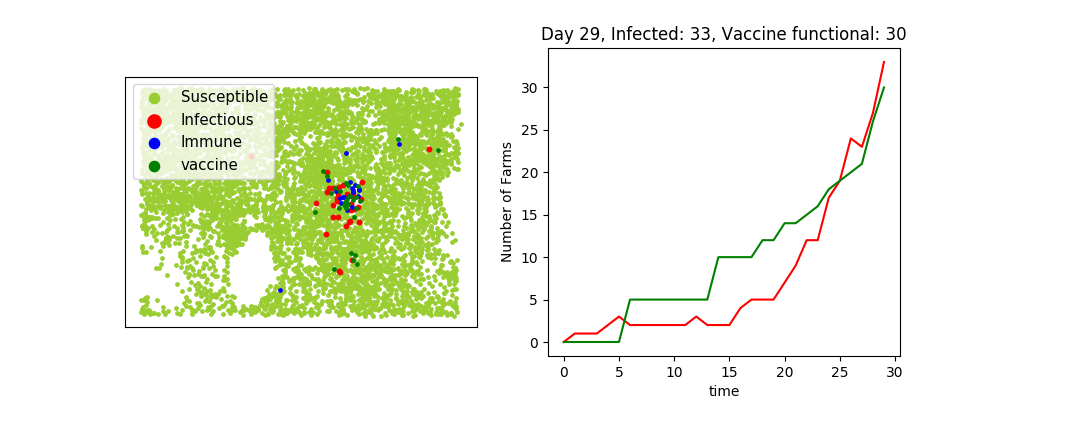

[3467]
[3467]
[3467]
[3465, 3467]
[3465, 3466, 3467]
[3465, 3466]
[3465, 3466]
[3466, 3468]
[3466, 3468]
[3466, 3468]
[3466, 3468]
[3466, 3468, 3755]
[3468, 3755]
[3468, 3755]
[3468, 3755]
[3468, 3651, 3755, 3961]
[3284, 3468, 3651, 3755, 3961]
[3284, 3649, 3651, 3755, 3961]
[3284, 3649, 3651, 3755, 3961]
[2328, 3176, 3284, 3649, 3651, 3755, 3961]
[2328, 3176, 3284, 3557, 3649, 3651, 3755, 3961, 3962]
[2328, 3176, 3379, 3557, 3649, 3651, 3755, 3850, 3961, 3962, 4381, 5296]
[2222, 2328, 3176, 3379, 3557, 3649, 3755, 3850, 3961, 3962, 4381, 5296]
[2222, 2328, 2399, 3176, 3379, 3459, 3557, 3649, 3653, 3850, 3961, 3962, 4070, 4071, 4379, 4381, 5296]
[2222, 2328, 2399, 3176, 3379, 3459, 3649, 3653, 3658, 3752, 3753, 3840, 3850, 3962, 4070, 4071, 4379, 4381, 5296]
[2222, 2328, 2399, 2997, 3288, 3379, 3459, 3649, 3653, 3655, 3658, 3752, 3753, 3762, 3840, 3850, 3854, 3962, 4071, 4379, 4381, 4467, 5296, 5604]
[2222, 2328, 2997, 3288, 3459, 3550, 3649, 3653, 3655, 3658, 3752, 3753, 3762, 3840, 3

KeyboardInterrupt: 

In [46]:
for f in range(10):
    cumInfEFF = np.zeros(1)
    endemicEFF = np.zeros(1)
    maxEFF = np.zeros(1)
    costEFF = []
    timeEFF =  []
    infEFF = []
    cumInfArray = np.zeros(800)
    InfArray = np.zeros(800)
#     for inde,efficac in enumerate(efficacy):
    # for i in range(1):
    start_time = time.time()
#Choose initial cases
    cattle = copy.deepcopy(Data['cattle'].values).astype(int)
    sheep = copy.deepcopy(Data['sr'].values).astype(int)
    t = 0
    cost = np.zeros(N)
    RingVac = 0.5
    A = np.zeros(shape=(N,10))     
    A[:,0] = -1 
    vac = np.zeros(N)
    cumInf = np.zeros(800)
    numInf = np.zeros(800)

    initial1 = random.randint(0,N-1)
    initial2 = (initial1+1)%N
    initial3 = (initial2+1)%N

    infect_cow = np.zeros(N)
    infect_sheep = np.zeros(N)
    I = np.zeros(N)

    I[initial1] = 1
    I[initial2] = 1
    I[initial3] = 1

    A[initial1, ] = [initial1, 0, s[initial1], r[initial1], tr[initial1], q[initial1], 0,0,  0,0]
    A[initial2, ] = [initial2, 0, s[initial2], r[initial2], tr[initial2], q[initial2], 0,0, 0,0]
    A[initial3, ] = [initial3, 0, s[initial3], r[initial3], tr[initial3], q[initial1], 0,0, 0,0]

    infectind = [i for i in range(np.size(I)) if I[i]==2]
    susceptind = [i for i in range(np.size(I)) if I[i] ==0]
    exposedind = [i for i in range(np.size(I)) if I[i] == 1]
    immuneind = [i for i in range(np.size(I)) if I[i] ==4]
    vaccineind = [i for i in range(np.size(I)) if I[i]==3]

    Inf=[len(infectind)]
    Sus = [len(susceptind)]
    Exp = [len(exposedind)]
    Imm = [len(immuneind)]
    Vac = [len(vaccineind)]

    time_plot=[0]
    %matplotlib notebook
    start_time = time.time()
    fig = plt.figure(figsize = (10,4))
    ax = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)
    plt.ion

    fig.show()
    fig.canvas.draw()
    Dose = []
    VAC = []
    travelled = []
    Capacity = 80
#     print(efficac)

    while t<800:
        infNum = 0
        t = t+1
        ################################## Reintroduction infection #################################
#         if t%90 == 0:
#             Suslen = len(np.where(I==0)[0])
#             newlyinfected = np.where(I==0)[0][random.randint(0,Suslen-1)]
#             I[newlyinfected] = 2
#             cattle[newlyinfected] = true_cattle[newlyinfected]
#             sheep[newlyinfected] = true_sheep[newlyinfected]
#             A[newlyinfected, ] = [newlyinfected, t, s[newlyinfected], r[newlyinfected], tr[newlyinfected],
#                                   q[newlyinfected], 0, 0,0,0]

        ################################### WITHIN FARM INFECTION ####################################
        for farm in infectind:
            Num_livestock = infect_cow[farm] + infect_sheep[farm]
            λ = 0.1
            inf = 1-((1-λ)**Num_livestock) 
            for animals in range(int(cattle[farm]+sheep[farm])):
                p_beta = np.random.uniform(0,1)
                if (p_beta<inf) and (infect_sheep[farm]+infect_cow[farm])<=Num_livestock:
                    if (random.random() < 0.5 and sheep[farm]>=1 and infect_sheep[farm]<sheep[farm]):
                        infect_sheep[farm] += 1
                    elif (cattle[farm]>=1 and infect_cow[farm]<cattle[farm]):
                        infect_cow[farm] +=1

        ################################# BETWEEN FARM INFECTION  #####################################

        ###############################################################################################
        ######################################### ATTRIBUTES ##########################################
#         ###############################################################################################
        transmission_matrix = (a1*shares_equipment+ #need to clear and update this everytime
        a2*shares_water+
        a3*shares_grazing + 
        a4*shares_milk + 
        a5*shares_vet + 
        a6*contactanimal + 
        a7*contacthuman)


        beta = np.zeros(N)
#         beta1 = nu*(cattle-infect_cow)**chi + (sheep-infect_sheep)**chi
        beta1 = nu*(xi*(cattle-infect_cow)**chi + (sheep-infect_sheep)**chi)
        beta3 = zeta*(infect_cow)**chi + infect_sheep**chi

        for i in range(N):
            transmission_matrix[:,i] *= (beta3)[i]
        for j in range(0,N):
            a = transmission_matrix[j, I ==2]
            b =  kerneldist[I ==2, j]
            beta[j] = beta1[j]*np.dot(a,b)
#             beta[j] = beta1[j]*np.matrix(transmission_matrix)[j,I==2]*np.matrix(kerneldist)[I == 2, j]

        prob_inf = (1 - np.exp(-beta))
        unif = np.random.uniform(0, 1, N)

        ### immunity ###
        for i in range(N):
            if (I[i] == 4) or (I[i] == 3):
                cattle[i] = 0
                sheep[i] = 0
                prob_inf[i] = 0
        for i in range(0,N):
            if (unif[i] <= prob_inf[i] and I[i] == 0):
                cattle[i] = true_cattle[i]
                sheep[i] = true_sheep[i]
                I[i] =  1
                A[i, ] = [i, t, s[i], r[i], tr[i], q[i], 0, 0,0,0]
        #########################################################################################################
        ########################################### NO ATTRIBUTES ###############################################
        #########################################################################################################
#         beta1 = nu*(cattle-infect_cow)**chi + (sheep-infect_sheep)**chi
#         beta1 = nu*(xi*(cattle-infect_cow)**chi + (sheep-infect_sheep)**chi)
#         beta = np.zeros(N)

#         for j in range(0,N):
#             beta[j] = beta1[j]*(np.sum((zeta*(infect_cow[I==2]**chi) +(infect_sheep[I==2]**chi))*kerneldist[I==2, j]))

#         prob_inf = (1 - np.exp(-beta)) 
#         unif = np.random.uniform(0, 1, N)

#         ####immunity####
#         for i in range(N):
#             if (I[i] == 4) or (I[i] == 3):
#                 cattle[i] = 0
#                 sheep[i] = 0
#                 prob_inf[i] = 0
#         for i in range(0,N):
#             if (unif[i] <= prob_inf[i] and I[i] == 0):
#                 cattle[i] = true_cattle[i]
#                 sheep[i] = true_sheep[i]
#                 I[i] =  1
#                 A[i, ] = [i, t, s[i], r[i], tr[i], q[i], 0, 0,0,0]
        #########################################################################################################
        ######################################## UPDATE STATES ##################################################
        #########################################################################################################

        ###################################### EXPOSED TO INFECTIOUS ############################################

        inf = A[:,0][A[:,1] + A[:,2] == t]

        I[inf.astype(np.int64)] = 2


        ####################### UPDATE NUMBER OF INFECTED ANIMALS WITHIN AN INFECTIOUS FARM #####################

        for i in inf: 
            i = int(i)
            if (random.random() < (sheep[i]/(sheep[i] +cattle[i])) and sheep[i]>=1 and infect_sheep[i]<sheep[i]):
                infect_sheep[i] += 1
            elif (cattle[i]>=1 and infect_cow[i]<cattle[i]):
                infect_cow[i] +=1

        ########################################### RING VACCINATION ###########################################
#         eff = np.random.beta(3, 10)
#         eff = np.random.beta(10,3)
#             eff = efficac
# #             print(eff)
#             trig = A[:,0][A[:,1] + A[:,2] + A[:,4] == t] #trigger vaccines
#     #         print(trig)

#             for i in range(len(trig)):
#                 n = [k for k in range(len(I)) if dist[trig[i].astype(np.int64), k] <RingCull/100]
#                 for j in range(len(n)):
#                     m = n[j]
#                     if A[m,7] == 0:
#                         VAC = np.append(VAC, m)
#                         travelled.append(dist[trig[i].astype(np.int64), m])
#     #         VAC = [x for _,x in sorted(zip([x for x in travelled],VAC))]
#             VAC, indices = np.unique(np.array(VAC, dtype=np.int), return_inverse=True)
#             VAC = VAC[indices]
#             if len(VAC) > 0:
#                 VAC = VAC.astype(np.int64)
#             if len(VAC)>Capacity:
#                 cost[VAC[0:Capacity]] += farm_cost[VAC[0:Capacity]]

#                 for j in range(len(VAC[0:Capacity])):
#                     m = VAC[j]
#                     A[m,0] = m
#                     A[m,7] = t
#                     if (I[m] == 0):

#                         if np.random.uniform(0,1) <eff:
#                             A[m, 8] = np.random.negative_binomial(6*28, 6*28/(12*28))
#                             A[m,9] = A[m,8] + t
#                             I[m] = 3
#                             cattle[m] = 0
#                             sheep[m] = 0
#                     elif (I[m] == 3):
#                         if np.random.uniform(0,1) < eff:
#                             immunity = np.random.negative_binomial(6*28, 6*28/(12*28))

#                             if (A[m,9]) < (immunity+t):
#                                 A[m,8] = immunity
#                                 A[m, 9] = immunity +t
#                             else:
#                                 A[m,8] = A[m,9] - t
#                     elif (I[m] ==4):
#                         if np.random.uniform(0,1) < eff:
#                             immunity = np.random.negative_binomial(6*28, 6*28/(12*28))
#                             if (A[m,6] )< (immunity +t):
#                                 A[m,8] = immunity
#                                 A[m,9] = immunity + t
#                                 I[m] = 3
#                                 A[m,6] = 0
#                                 cattle[m] = 0
#                                 sheep[m] = 0
#                 VAC = np.delete(VAC, range(0, Capacity), None)
#             else: 
#                 cost[0:len(VAC)] += farm_cost[0:len(VAC)]
#     #             eff = 1
#     #             eff = np.random.beta(3,10)
#                 eff = np.random.beta(10,3)
#                 for j in range(len(VAC)):
#                     m = VAC[j]
#                     A[m, 0] = m
#                     A[m, 7] = t
#                     if (I[m] == 0):
#                         if np.random.uniform(0,1) <eff:
#                             A[m, 8] = np.random.negative_binomial(6*28, 6*28/(12*28))
#                             A[m, 9] = A[m, 8] +t
#                             I[m] = 3
#                             cattle[m] = 0
#                             sheep[m] = 0
#                     elif (I[m] == 3):
#                         if np.random.uniform(0,1) < eff:
#                             immunity = np.random.negative_binomial(6*28, 6*28/(12*28))
#                             if (A[m,9]) < (immunity +t):
#                                 A[m,8] = immunity
#                                 A[m,9] = immunity +t
#                             else:
#                                 A[m,8] = A[m,9] - t
#                     elif (I[m] ==4):
#                         if np.random.uniform(0,1) < eff:
#                             immunity = np.random.negative_binomial(6*28, 6*28/(12*28))
#                             if (A[m,6] )< (immunity +t):
#                                 A[m,8] = immunity
#                                 A[m,9] = immunity + t
#                                 I[m] = 3
#                                 A[m,6] = 0  
#                                 cattle[m] = 0
#                                 sheep[m] = 0
#                 VAC = np.delete(VAC, range(0, len(VAC)), None)


########################################### 25% RING VACCINATION ###########################################
        
#         eff = np.random.beta(10,3)
#         eff = efficac
#             print(eff)
        trig = A[:,0][A[:,1] + A[:,2] + A[:,4] == t] #trigger vaccines
#         print(trig)

        for i in range(len(trig)):

            n2 = [k for k in range(len(I)) if dist[trig[i].astype(np.int64), k] <1.0*RingCull/100]
            index=list(np.where(np.random.uniform(0,1,len(n2))<0.25*np.ones(len(n2)))[0])
            n=list(np.asarray(n2)[index])


#                 n = [k for k in range(len(I)) if dist[trig[i].astype(np.int64), k] <RingCull/100]
            for j in range(len(n)):
                m = n[j]
                if A[m,7] == 0:
                    VAC = np.append(VAC, m)
                    travelled.append(dist[trig[i].astype(np.int64), m])
#         VAC = [x for _,x in sorted(zip([x for x in travelled],VAC))]
        VAC, indices = np.unique(np.array(VAC, dtype=np.int), return_inverse=True)
        VAC = VAC[indices]
        if len(VAC) > 0:
            VAC = VAC.astype(np.int64)
        if len(VAC)>Capacity:
            eff = np.random.beta(2, 8)
            cost[VAC[0:Capacity]] += farm_cost[VAC[0:Capacity]]

            for j in range(len(VAC[0:Capacity])):
                m = VAC[j]
                A[m,0] = m
                A[m,7] = t
                if (I[m] == 0):

                    if np.random.uniform(0,1) <eff:
                        A[m, 8] = np.random.negative_binomial(6*28, 6*28/(12*28))
                        A[m,9] = A[m,8] + t
                        I[m] = 3
                        cattle[m] = 0
                        sheep[m] = 0
                elif (I[m] == 3):
                    if np.random.uniform(0,1) < eff:
                        immunity = np.random.negative_binomial(6*28, 6*28/(12*28))

                        if (A[m,9]) < (immunity+t):
                            A[m,8] = immunity
                            A[m, 9] = immunity +t
                        else:
                            A[m,8] = A[m,9] - t
                elif (I[m] ==4):
                    if np.random.uniform(0,1) < eff:
                        immunity = np.random.negative_binomial(6*28, 6*28/(12*28))
                        if (A[m,6] )< (immunity +t):
                            A[m,8] = immunity
                            A[m,9] = immunity + t
                            I[m] = 3
                            A[m,6] = 0
                            cattle[m] = 0
                            sheep[m] = 0
            VAC = np.delete(VAC, range(0, Capacity), None)
        else: 
            eff = np.random.beta(2, 8)
            cost[0:len(VAC)] += farm_cost[0:len(VAC)]
#             eff = 1
#             eff = np.random.beta(3,10)
#             eff = np.random.beta(10,3)
            for j in range(len(VAC)):
                m = VAC[j]
                A[m, 0] = m
                A[m, 7] = t
                if (I[m] == 0):
                    if np.random.uniform(0,1) <eff:
                        A[m, 8] = np.random.negative_binomial(6*28, 6*28/(12*28))
                        A[m, 9] = A[m, 8] +t
                        I[m] = 3
                        cattle[m] = 0
                        sheep[m] = 0
                elif (I[m] == 3):
                    if np.random.uniform(0,1) < eff:
                        immunity = np.random.negative_binomial(6*28, 6*28/(12*28))
                        if (A[m,9]) < (immunity +t):
                            A[m,8] = immunity
                            A[m,9] = immunity +t
                        else:
                            A[m,8] = A[m,9] - t
                elif (I[m] ==4):
                    if np.random.uniform(0,1) < eff:
                        immunity = np.random.negative_binomial(6*28, 6*28/(12*28))
                        if (A[m,6] )< (immunity +t):
                            A[m,8] = immunity
                            A[m,9] = immunity + t
                            I[m] = 3
                            A[m,6] = 0  
                            cattle[m] = 0
                            sheep[m] = 0
            VAC = np.delete(VAC, range(0, len(VAC)), None)


        ########################################### vaccine wears off ###########################################

        new_dose = A[:,0][A[:,7]+6*28 == t] #records when the farmer will get a new vaccine


        for j in new_dose:
            j = j.astype(np.int64)
            if (A[j,8] > 6*28) and (I[j]==3):
                A[j, 7] = 0
                VAC = np.append(VAC, j)
            else: 
                A[j, 7] = 0
                A[j, 8] = 0
                A[j,9] = 0
                VAC = np.append(VAC, j)
                if I[j] == 3:
                    I[j] = 0
                    cattle[j] = true_cattle[j]
                    sheep[j] = true_sheep[j]

        vaccinate_ends = A[:,0][A[:,9] == t]

        for j in vaccinate_ends:
            j = j.astype(np.int64)
            if I[j] ==3:
                I[j] =0
                cattle[j] = true_cattle[j]
                sheep[j] = true_sheep[j]

        ######################################### NO IMMUNITY ###################################################

#         rem = A[:,0][A[:,1] + A[:,2] + A[:,3] == t] #Move to S state once infectious period is over
#         infect_sheep[rem.astype(np.int64)] = 0
#         infect_cow[rem.astype(np.int64)] = 0
#         A[rem.astype(np.int64), ] = [0,0,0,0,0,0,0]
#         I[rem.astype(np.int64)] = 0

#         infected = [i for i in range(N) if (infect_cow+infect_sheep)[i]>0]
#         for farm in infected:
#             mu = 0.05
#             recover = np.random.uniform(0,1)
#             for animals in range(int(infect_cow[farm]+infect_sheep[farm])):
#                 if recover < mu and (infect_sheep[farm]+infect_cow[farm]) >=1 :
#                     if (random.random() < 0.5 and infect_sheep[farm]>=1 ):
#                         infect_sheep[farm] -= 1
#                     elif infect_cow[farm]>=1: 
#                         infect_cow[farm] -=1
#                     if infect_sheep[farm]+infect_cow[farm] ==0: #farm has recovered before its end period
#                         I[farm] = 0


        ######################################### IMMUNITY #######################################################

        rem = A[:,0][A[:,1] + A[:,2] + A[:,3] == t] #Move to IM state once infectious period is over
        for i in rem:
            i = i.astype(np.int64)
            if I[i] == 2:
                I[i] =4
                cattle[i] = 0
                sheep[i] = 0
                A[i, 6] = A[i, 5] +t
                infect_sheep[i] = 0
                infect_cow[i] = 0

        immune = A[:,0][A[:,1] + A[:,2] + A[:,3] + A[:,5] == t] #Move to S state once immune period is over
        I[immune.astype(np.int64)] = 0
        A[immune.astype(np.int64), ] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        for k in immune:
            k = k.astype(np.int64)
            cattle[k] = true_cattle[k]
            sheep[k] = true_sheep[k]


        #### WITHIN FARM RECOVERY ####
        infected = [i for i in range(N) if (infect_cow+infect_sheep)[i]>0]
        for farm in infected:
            mu = 0.01
            recover = np.random.uniform(0,1)
            for animals in range(int(infect_cow[farm]+infect_sheep[farm])):
                if recover < mu and (infect_sheep[farm]+infect_cow[farm]) >=1 :
                    if (random.random() <(infect_sheep[farm]/(infect_sheep[farm]+infect_cow[farm])) and infect_sheep[farm]>=1 ):
                        infect_sheep[farm] -= 1
                    elif infect_cow[farm]>=1: 
                        infect_cow[farm] -=1
                    if infect_sheep[farm]+infect_cow[farm] ==0: 
                        I[farm] = 4
                        infect_sheep[farm] = 0
                        infect_cow[farm] = 0
                        cattle[farm] = 0
                        sheep[farm] = 0
                        A[farm, 6] = A[farm, 5] +t

        ############################################### PLOTS #####################################################

        infectind = [i for i in range(np.size(I)) if I[i]==2]
#         print(infectind)
        susceptind = [i for i in range(np.size(I)) if I[i]==0]
        exposedind = [i for i in range(np.size(I)) if I[i] == 1]
        immuneind = [i for i in range(np.size(I)) if I[i] ==4]
        vaccineind = [i for i in range(np.size(I)) if I[i]==3]
        had_dose = [i for i in range(np.size(I)) if A[i,6]>0]
        if t>0:
            infNum += len(inf)

        numinf2 = len(inf)
        Dose.append(len(had_dose))
        #print('infect', sum(I==2), 'immue', sum(I==4), 'time', t, sum(I==0)+sum(I==1)+sum(I==2)+sum(I==3)+sum(I==4))
        Inf.append(len(infectind))
        Sus.append(len(susceptind))
        Exp.append(len(exposedind))
        Imm.append(len(immuneind))
        Vac.append(len(vaccineind))
        time_plot.append(t)



        xinfectplot = xcoord[infectind]
        yinfectplot = ycoord[infectind]
        xsusceptplot = xcoord[susceptind]
        ysusceptplot = ycoord[susceptind]
        xexposeplot = xcoord[exposedind]
        yexposeplot = ycoord[exposedind]
        ximmuneplot = xcoord[immuneind]
        yimmuneplot = ycoord[immuneind]
        xvaccineplot = xcoord[vaccineind]
        yvaccineplot = ycoord[vaccineind]
        ax.clear()

        ax1.clear()


#         ax1.plot(time_plot,Sus,label='Susceptible', c='yellowgreen')
        ax1.plot(time_plot,Inf,label='Infectious', c='r')
#         ax1.plot(time_plot, Imm, label = 'immune', c='b')
        ax1.plot(time_plot, Vac, label = 'vaccine', c='g')
        plt.xlabel('time')
        plt.ylabel('Number of Farms')
#         ax1.legend()


        ax.scatter(xsusceptplot, ysusceptplot, c='yellowgreen', marker='o', s=6, label='Susceptible')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.scatter(xinfectplot, yinfectplot, c='r', marker='o', s=10, label='Infectious')
        ax.scatter(ximmuneplot, yimmuneplot, c='b', marker='o', s=6, label='Immune')
        ax.scatter(xvaccineplot, yvaccineplot, c='g', marker = 'o', s = 6, label = 'vaccine')
        ax.axis([0, np.max(xcoord), 0, np.max(ycoord)])


        plt.title('Day {}, Infected: {}, Vaccine functional: {}'.format(t, np.size(xinfectplot), np.size(xvaccineplot)),fontsize = 12)
        ax.axis('scaled')
        ax.legend(loc = 'upper left', fontsize = 10.8,  markerscale= 3)

        cumInf[t] = cumInf[t-1] + infNum
#         print(cumInf)
        numInf[t] = numinf2

        if sum(I == 1) + sum(I == 2) == 0:
            a = cumInf[t-1]
            cumInf[t:] = a
            numInf[t:] = 0
            cumInfArray = np.vstack((cumInfArray, cumInf))
            InfArray = np.vstack((InfArray, numInf))
            endemicEFF[0] = 0
            cumInfEFF[0] = cumInf[799]
            maxEFF[0] = np.max(Inf)
            timeEFF.append(time_plot)
            infEFF.append(Inf)
            costEFF.append(cost)
            break
        if t == 799:
            cumInfEFF[0] = cumInf[799]
            endemicEFF[0] = np.mean(Inf[600:])
            maxEFF[0] = np.max(Inf)
            timeEFF.append(time_plot)
            infEFF.append(Inf)
            costEFF.append(cost)
            break
#         print('immune', count_imm, 'infect', count_inf)

        fig.canvas.draw()
    print(time.time()-start_time)
    Cumulative2.append(cumInfEFF)
    Endemic2.append(endemicEFF)
    Maximum2.append(maxEFF)
    Totalcost2.append(costEFF)
    Duration2.append(timeEFF)
    Infection2.append(infEFF)
    np.save('cumulativeinf', Cumulative2)
    np.save('Infect', Infection2)
    np.save('endemicinf', Endemic2)
    np.save('Maxinf', Maximum2)
    np.save('durationstime', Duration2)
    np.save('costsinf', Totalcost2)

In [ ]:
# np.save('cumulative2', Cumulative2)
# np.save('Infection2', Infection2)
# np.save('endemic2', Endemic2)
# np.save('Max2', Maximum2)
# np.save('durations2', Duration2)
# np.save('costs2', Totalcost2)